<a href="https://colab.research.google.com/github/Jayasri1090/EN3150-Assignment-03-Simple-convolutional-neural-network-to-perform-classification/blob/main/EN3150_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EN3150 Assignment 03 - Jute Pest Classification

# STEP 1: Upload your Jute Pest dataset folders

from google.colab import files
import zipfile
import os
import shutil

print("Upload your Jute Pest dataset ZIP file...")
print("It should contain: train/, val/, and test/ folders")

# Upload the ZIP file containing all three folders
uploaded = files.upload()

# Extract the dataset
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        print(f"Extracting {filename}...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content/jute_pest_dataset')

        # Check what we extracted
        dataset_path = '/content/jute_pest_dataset'
        print(f"Dataset extracted to: {dataset_path}")
        print(f"📁 Contents: {os.listdir(dataset_path)}")

        # Check each folder
        for folder in ['train', 'val', 'test']:
            folder_path = os.path.join(dataset_path, folder)
            if os.path.exists(folder_path):
                class_count = len(os.listdir(folder_path))
                print(f"   📂 {folder}: {class_count} classes")
            else:
                print(f"   ❌ {folder} folder not found!")

Upload your Jute Pest dataset ZIP file...
It should contain: train/, val/, and test/ folders


Saving Jute_Pest_Dataset.zip to Jute_Pest_Dataset.zip
Extracting Jute_Pest_Dataset.zip...
Dataset extracted to: /content/jute_pest_dataset
📁 Contents: ['Jute_Pest_Dataset']
   ❌ train folder not found!
   ❌ val folder not found!
   ❌ test folder not found!


In [ ]:
# STEP 2: Explore the nested folder structure
import os

def explore_nested_structure(dataset_path):
    """
    Explore the actual nested structure of your dataset
    """
    print("Exploring nested dataset structure...")
    print("=" * 50)

    splits = ['train', 'val', 'test']

    for split in splits:
        split_path = os.path.join(dataset_path, split)
        if os.path.exists(split_path):
            print(f"\n {split.upper()} Split:")
            print("-" * 30)

            # Get all class folders inside this split
            classes = [d for d in os.listdir(split_path)
                      if os.path.isdir(os.path.join(split_path, d))]

            print(f"   Classes found: {classes}")

            # Count images in each class
            for class_name in classes:
                class_path = os.path.join(split_path, class_name)
                images = [f for f in os.listdir(class_path)
                         if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
                print(f"   📁 {class_name}: {len(images)} images")

                # Show first few image names
                if images:
                    print(f"      Sample images: {images[:3]}")

# Explore your actual structure
dataset_path = '/content/jute_pest_dataset/Jute_Pest_Dataset'
explore_nested_structure(dataset_path)

Exploring nested dataset structure...

 TRAIN Split:
------------------------------
   Classes found: ['Cutworm', 'Jute Aphid', 'Mealybug', 'Leaf Beetle', 'Scopula Emissaria', 'Jute Hairy', 'Jute Red Mite', 'Pod Borer', 'Beet Armyworm', 'Jute Stem Weevil', 'Yellow Mite', 'Termite odontotermes (Rambur)', 'Jute Stem Girdler', 'Field Cricket', 'Termite', 'Jute Semilooper', 'Black Hairy']
   📁 Cutworm: 399 images
      Sample images: ['agrotis_ipsilon--1-_png.rf.7af6eacabe0fa33aff0f1dcb7a3ded80.jpg', 'cutworm0_0_890.jpg', 'cutworm0_0_3824.jpg']
   📁 Jute Aphid: 530 images
      Sample images: ['jpg-1431-_jpg.rf.67cc21965ba3e51f0b6b779b72874365.jpg', 'Aug_Aphis gossypii Glover_23.jpg', 'Aug_Aphis gossypii Glover_274.jpg']
   📁 Mealybug: 466 images
      Sample images: ['Aug_Ferisia pseudococcus (Signoret)_323.jpg', 'Aug_Ferisia pseudococcus (Signoret)_2.jpg', 'Mealy-Bug_725_png.rf.b918317e972a1cdbaffa7408acef3bb9.jpg']
   📁 Leaf Beetle: 310 images
      Sample images: ['Aug_Luperomorpha vit

In [ ]:
# STEP 1.3: Load dataset with the correct nested structure

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def load_jute_pest_dataset(dataset_path, img_size=(128, 128), batch_size=32):
    """
    Load the Jute Pest dataset with nested folder structure
    """
    print("Loading Jute Pest Dataset...")
    print("=" * 40)

    # Define the paths to each split
    train_path = os.path.join(dataset_path, 'train')
    val_path = os.path.join(dataset_path, 'val')
    test_path = os.path.join(dataset_path, 'test')

    print(f"Train path: {train_path}")
    print(f"Val path: {val_path}")
    print(f"Test path: {test_path}")

    # Load datasets using TensorFlow's image_dataset_from_directory
    # This function automatically handles nested class folders!
    train_ds = tf.keras.utils.image_dataset_from_directory(
        train_path,
        image_size=img_size,
        batch_size=batch_size,
        label_mode='categorical',  # For multi-class classification
        shuffle=True,
        seed=42
    )

    val_ds = tf.keras.utils.image_dataset_from_directory(
        val_path,
        image_size=img_size,
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=True,
        seed=42
    )

    test_ds = tf.keras.utils.image_dataset_from_directory(
        test_path,
        image_size=img_size,
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=False  # Don't shuffle test set for consistent evaluation
    )

    # Get class names
    class_names = train_ds.class_names
    print(f"Classes found: {class_names}")
    print(f"Training batches: {tf.data.experimental.cardinality(train_ds)}")
    print(f"Validation batches: {tf.data.experimental.cardinality(val_ds)}")
    print(f"Test batches: {tf.data.experimental.cardinality(test_ds)}")

    return train_ds, val_ds, test_ds, class_names

# Load your dataset with the correct structure
dataset_path = '/content/jute_pest_dataset/Jute_Pest_Dataset'
train_ds, val_ds, test_ds, class_names = load_jute_pest_dataset(dataset_path)

Loading Jute Pest Dataset...
Train path: /content/jute_pest_dataset/Jute_Pest_Dataset/train
Val path: /content/jute_pest_dataset/Jute_Pest_Dataset/val
Test path: /content/jute_pest_dataset/Jute_Pest_Dataset/test
Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.
Classes found: ['Beet Armyworm', 'Black Hairy', 'Cutworm', 'Field Cricket', 'Jute Aphid', 'Jute Hairy', 'Jute Red Mite', 'Jute Semilooper', 'Jute Stem Girdler', 'Jute Stem Weevil', 'Leaf Beetle', 'Mealybug', 'Pod Borer', 'Scopula Emissaria', 'Termite', 'Termite odontotermes (Rambur)', 'Yellow Mite']
Training batches: 202
Validation batches: 13
Test batches: 12


🖼️ Visualizing sample images...


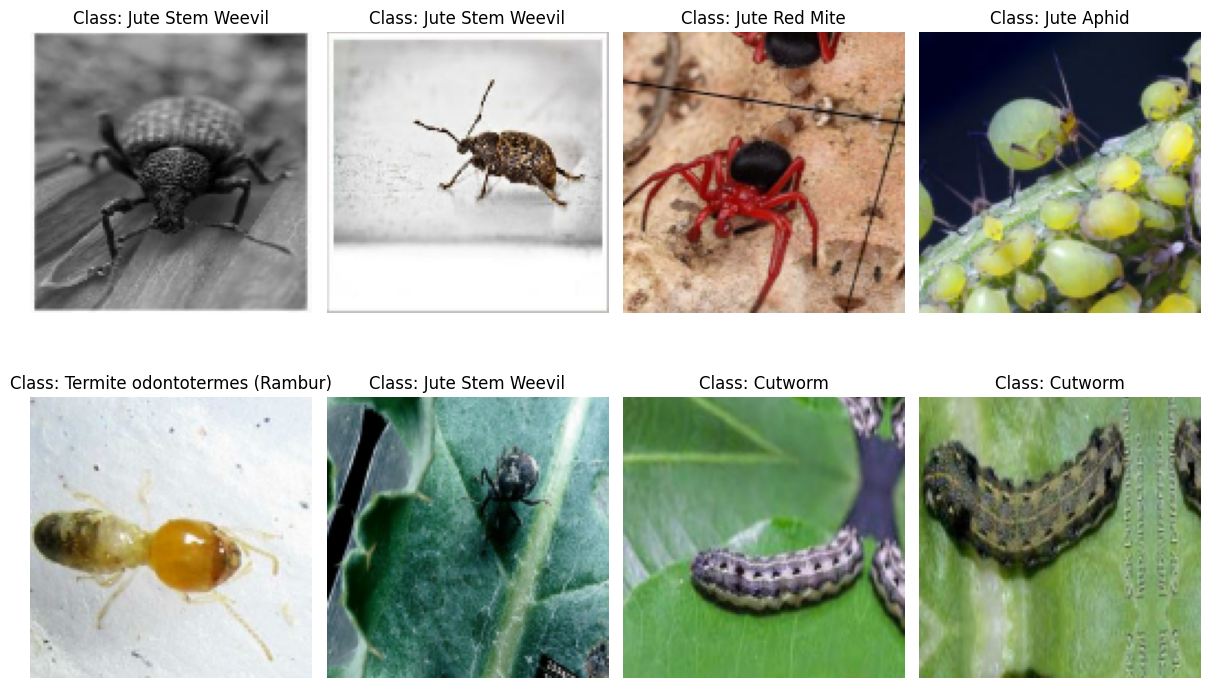

In [ ]:
# STEP 1.4: Visualize samples from your dataset

def visualize_samples(dataset, class_names, num_samples=8):
    """
    Display sample images from the dataset
    """
    print("🖼️ Visualizing sample images...")

    plt.figure(figsize=(12, 8))
    for images, labels in dataset.take(1):  # Take first batch
        for i in range(min(num_samples, len(images))):
            plt.subplot(2, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            # Get the class name
            label_idx = tf.argmax(labels[i]).numpy()
            class_name = class_names[label_idx]

            plt.title(f"Class: {class_name}")
            plt.axis("off")

    plt.tight_layout()
    plt.show()

# Visualize training samples
visualize_samples(train_ds, class_names)

In [ ]:
# STEP 1.5: Get dataset statistics

def get_dataset_stats(train_ds, val_ds, test_ds, class_names):
    """
    Calculate and display dataset statistics
    """
    print("Dataset Statistics")
    print("=" * 40)

    def count_images(dataset):
        total = 0
        for images, labels in dataset:
            total += images.shape[0]
        return total

    train_count = count_images(train_ds)
    val_count = count_images(val_ds)
    test_count = count_images(test_ds)
    total_count = train_count + val_count + test_count

    print(f"Number of classes: {len(class_names)}")
    print(f"Training images: {train_count} ({train_count/total_count*100:.1f}%)")
    print(f"Validation images: {val_count} ({val_count/total_count*100:.1f}%)")
    print(f"Test images: {test_count} ({test_count/total_count*100:.1f}%)")
    print(f"Total images: {total_count}")
    print(f"Class names: {class_names}")

# Get statistics
get_dataset_stats(train_ds, val_ds, test_ds, class_names)

Dataset Statistics
Number of classes: 17
Training images: 6443 (89.1%)
Validation images: 413 (5.7%)
Test images: 379 (5.2%)
Total images: 7235
Class names: ['Beet Armyworm', 'Black Hairy', 'Cutworm', 'Field Cricket', 'Jute Aphid', 'Jute Hairy', 'Jute Red Mite', 'Jute Semilooper', 'Jute Stem Girdler', 'Jute Stem Weevil', 'Leaf Beetle', 'Mealybug', 'Pod Borer', 'Scopula Emissaria', 'Termite', 'Termite odontotermes (Rambur)', 'Yellow Mite']


In [ ]:
# STEP 1.6: Optimize dataset performance

def optimize_dataset(train_ds, val_ds, test_ds):
    """
    Optimize dataset for better performance during training
    """
    # Prefetch and cache for better performance
    AUTOTUNE = tf.data.AUTOTUNE

    train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
    test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

    print("✅ Dataset optimization completed!")
    return train_ds, val_ds, test_ds

# Optimize datasets
train_ds, val_ds, test_ds = optimize_dataset(train_ds, val_ds, test_ds)

✅ Dataset optimization completed!


In [ ]:
# STEP 2: Build the CNN Model (Assignment Questions 4, 5, 6)
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(128, 128, 3), num_classes=17):
    """
    Create CNN model according to assignment specifications
    Q4: Build the CNN model with specified layers
    Q5: Determine parameters (activation functions, kernel sizes, etc.)
    Q6: Justify activation function selections
    """
    print("Building CNN Model...")
    print("=" * 50)

    model = models.Sequential([
        # First Convolutional Block (Q4)
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,
                     name='conv1'),
        layers.MaxPooling2D((2, 2), name='pool1'),

        # Second Convolutional Block (Q4)
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
        layers.MaxPooling2D((2, 2), name='pool2'),

        # Third Convolutional Block (Additional for better performance)
        layers.Conv2D(128, (3, 3), activation='relu', name='conv3'),
        layers.MaxPooling2D((2, 2), name='pool3'),

        # Flatten layer
        layers.Flatten(name='flatten'),

        # Fully connected layers (Q4)
        layers.Dense(256, activation='relu', name='dense1'),
        layers.Dropout(0.5, name='dropout1'),

        layers.Dense(128, activation='relu', name='dense2'),
        layers.Dropout(0.5, name='dropout2'),

        # Output layer (Q4)
        layers.Dense(num_classes, activation='softmax', name='output')
    ])

    return model

# Create the model
num_classes = len(class_names)
model = create_cnn_model(input_shape=(128, 128, 3), num_classes=num_classes)

# Display model architecture
print("Model Architecture:")
model.summary()

print("\n JUSTIFICATIONS (Q6):")
print("• ReLU activation in hidden layers: Prevents vanishing gradient, faster convergence")
print("• Softmax activation in output layer: Perfect for multi-class classification")
print("• Dropout (0.5): Reduces overfitting for better generalization")
print("• 3 Conv layers: Extracts hierarchical features from simple to complex")

Building CNN Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,551,121 (24.99 MB)

 Trainable params: 6,551,121 (24.99 MB)

 Non-trainable params: 0 (0.00 B)


 JUSTIFICATIONS (Q6):
• ReLU activation in hidden layers: Prevents vanishing gradient, faster convergence
• Softmax activation in output layer: Perfect for multi-class classification
• Dropout (0.5): Reduces overfitting for better generalization
• 3 Conv layers: Extracts hierarchical features from simple to complex


In [ ]:
# STEP 2.2: Compile the Model (Assignment Questions 8, 9)

def compile_model(model, learning_rate=0.001):
    """
    Q8: Choose optimizer and justify selection
    Q9: Set learning rate
    """
    print("Compiling Model...")
    print("=" * 40)

    # Q8: Using Adam optimizer - adaptive learning rate, good for CNN
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',  # For multi-class classification
        metrics=['accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )

    print("Model compiled successfully!")
    print(f"Optimizer: Adam (Q8 Justification: Adaptive learning rate, efficient for CNNs)")
    print(f"Learning Rate: {learning_rate} (Q9: Standard starting point for Adam)")

    return model

# Compile the model
model = compile_model(model, learning_rate=0.001)

Compiling Model...
Model compiled successfully!
Optimizer: Adam (Q8 Justification: Adaptive learning rate, efficient for CNNs)
Learning Rate: 0.001 (Q9: Standard starting point for Adam)


In [ ]:
# STEP 2.3: Train the Model with 0.001 default leaning rate

print("Starting Model Training (20 epochs as per assignment)...")
print("=" * 50)

# Define callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)
]

# Train the model for 20 epochs (as per assignment requirement)
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks,
    verbose=1
)

print("✅ Training completed!")

Starting Model Training (20 epochs as per assignment)...
Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.0947 - loss: 17.5153 - precision: 0.1172 - recall: 0.0152 - val_accuracy: 0.2010 - val_loss: 2.7721 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.1335 - loss: 2.7577 - precision: 0.6826 - recall: 0.0124 - val_accuracy: 0.2082 - val_loss: 2.7334 - val_precision: 0.6000 - val_recall: 0.0218 - learning_rate: 0.0010
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.1260 - loss: 2.7542 - precision: 0.6151 - recall: 0.0124 - val_accuracy: 0.1889 - val_loss: 2.7130 - val_precision: 0.6667 - val_recall: 0.0097 - learning_rate: 0.0010
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.1516 - loss: 2.7220 - precision: 0.6714 - recall: 0.0176 - val_accuracy: 0.2203 - val_loss: 2.7571 - val_precision: 0.5385 - val_recall: 0.0169 - learning_rate:

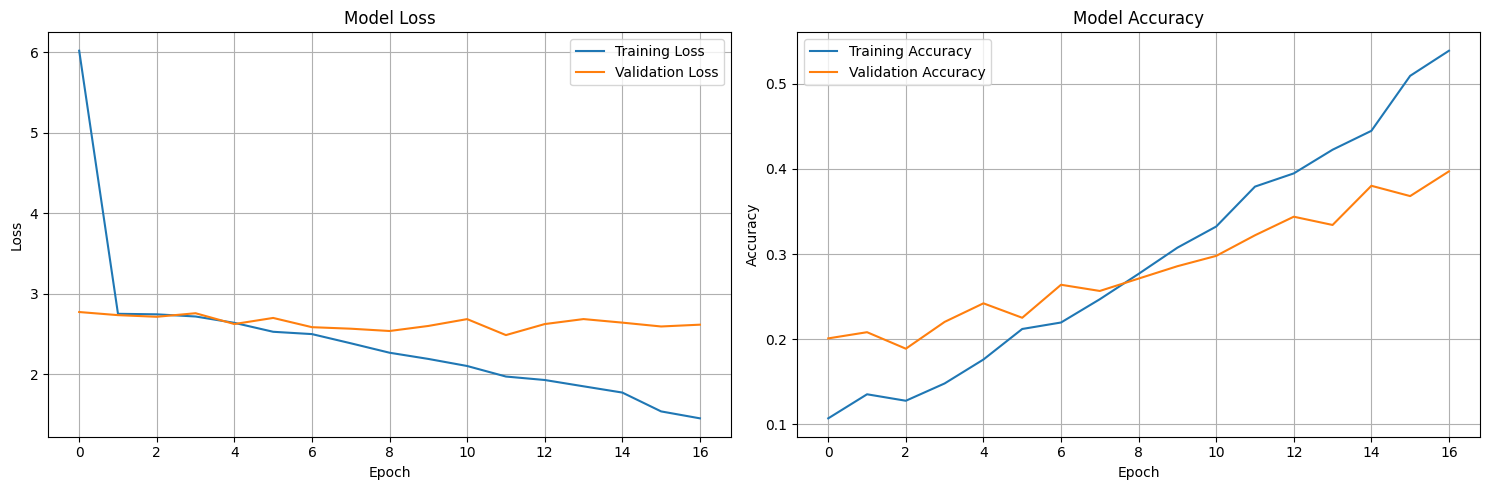

Final Training Accuracy: 0.5387
Final Validation Accuracy: 0.3971
Final Training Loss: 1.4507
Final Validation Loss: 2.6149


In [ ]:
# STEP 2.4: PLOT TRAINING AND VALIDATION LOSS FOR LR=0.0003

def plot_training_history(history):
    """
    Plot training and validation loss/accuracy
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training & validation loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot training & validation accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Print final metrics
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

# Plot the training history
plot_training_history(history)

In [ ]:
# STEP 2.5: TEST WITH LEARNING RATE = 0.0003

print("🔬 TESTING LEARNING RATE = 0.0003")
print("=" * 50)

# Test the specific learning rate you're interested in
target_lr = 0.0003

print(f"🎯 Testing Learning Rate: {target_lr}")

# Create fresh model
model_0003 = create_cnn_model(input_shape=(128, 128, 3), num_classes=len(class_names))

# Compile with target learning rate
model_0003.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=target_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train for more epochs to get better comparison
print("Training for 20 epochs...")
history_0003 = model_0003.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    verbose=1,  # Show progress this time
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
    ]
)

# Store results
lr_0003_results = {
    'final_train_acc': history_0003.history['accuracy'][-1],
    'final_val_acc': history_0003.history['val_accuracy'][-1],
    'final_train_loss': history_0003.history['loss'][-1],
    'final_val_loss': history_0003.history['val_loss'][-1],
    'overfitting_gap': history_0003.history['accuracy'][-1] - history_0003.history['val_accuracy'][-1],
    'convergence_epoch': len(history_0003.history['accuracy']),
    'history': history_0003.history
}

print(f"\n✅ LR {target_lr} Results:")
print(f"   Validation Accuracy: {lr_0003_results['final_val_acc']:.4f}")
print(f"   Training Accuracy:   {lr_0003_results['final_train_acc']:.4f}")
print(f"   Overfitting Gap:     {lr_0003_results['overfitting_gap']:.4f}")

🔬 TESTING LEARNING RATE = 0.0003
🎯 Testing Learning Rate: 0.0003
Building CNN Model...
Training for 20 epochs...
Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.0714 - loss: 12.4130 - val_accuracy: 0.2373 - val_loss: 2.7446 - learning_rate: 3.0000e-04
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.1325 - loss: 2.7472 - val_accuracy: 0.2663 - val_loss: 2.6076 - learning_rate: 3.0000e-04
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.1662 - loss: 2.6720 - val_accuracy: 0.2906 - val_loss: 2.4705 - learning_rate: 3.0000e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.1964 - loss: 2.5645 - val_accuracy: 0.3487 - val_loss: 2.2813 - learning_rate: 3.0000e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.2496 - loss: 2.4077 - val_accuracy: 0.4068 - val_loss: 2.1822 - learning_rate: 3.0000e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.2924 - loss: 2.2775 - val_accur

📊 PLOTTING TRAINING AND VALIDATION LOSS FOR LR=0.0003


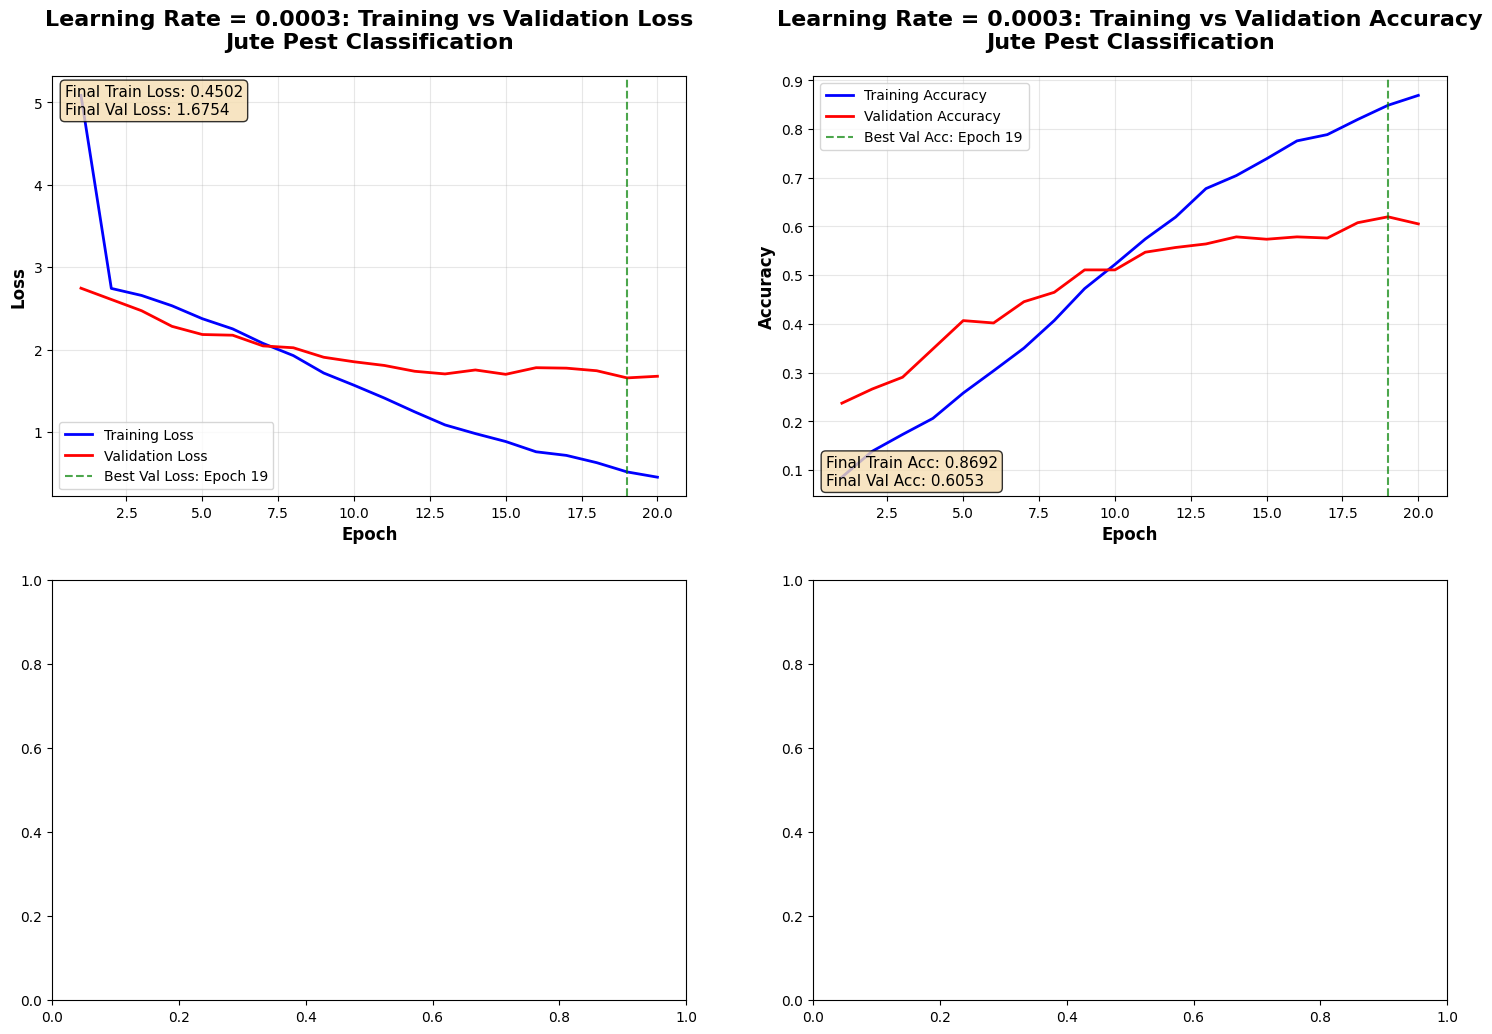

In [ ]:
# STEP 2.6: PLOT TRAINING AND VALIDATION LOSS FOR LR=0.0003

print("📊 PLOTTING TRAINING AND VALIDATION LOSS FOR LR=0.0003")
print("=" * 60)

# Get the training history for LR=0.0003
history = history_0003
epochs = range(1, len(history.history['loss']) + 1)

# Create comprehensive loss visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Training and Validation Loss
ax1.plot(epochs, history.history['loss'], 'b-', linewidth=2, label='Training Loss')
ax1.plot(epochs, history.history['val_loss'], 'r-', linewidth=2, label='Validation Loss')
ax1.set_title(f'Learning Rate = 0.0003: Training vs Validation Loss\nJute Pest Classification',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add final loss values to the plot
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
ax1.text(0.02, 0.98, f'Final Train Loss: {final_train_loss:.4f}\nFinal Val Loss: {final_val_loss:.4f}',
         transform=ax1.transAxes, verticalalignment='top', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Mark the best validation loss
best_val_loss_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = np.min(history.history['val_loss'])
ax1.axvline(x=best_val_loss_epoch, color='green', linestyle='--', alpha=0.7,
            label=f'Best Val Loss: Epoch {best_val_loss_epoch}')
ax1.legend()

# Plot 2: Training and Validation Accuracy
ax2.plot(epochs, history.history['accuracy'], 'b-', linewidth=2, label='Training Accuracy')
ax2.plot(epochs, history.history['val_accuracy'], 'r-', linewidth=2, label='Validation Accuracy')
ax2.set_title(f'Learning Rate = 0.0003: Training vs Validation Accuracy\nJute Pest Classification',
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add final accuracy values to the plot
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
ax2.text(0.02, 0.02, f'Final Train Acc: {final_train_acc:.4f}\nFinal Val Acc: {final_val_acc:.4f}',
         transform=ax2.transAxes, verticalalignment='bottom', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Mark the best validation accuracy
best_val_acc_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = np.max(history.history['val_accuracy'])
ax2.axvline(x=best_val_acc_epoch, color='green', linestyle='--', alpha=0.7,
            label=f'Best Val Acc: Epoch {best_val_acc_epoch}')
ax2.legend()

In [ ]:
# STEP 2.7: COMPARE LR=0.0003 WITH PREVIOUS BEST

print("📊 COMPARING LR=0.0003 WITH PREVIOUS RESULTS")
print("=" * 60)

# Get previous best results
if 'best_lr' in locals() and 'best_result' in locals():
    previous_best_lr = best_lr
    previous_best_result = best_result
else:
    # If not available, use our known best from earlier
    previous_best_lr = 0.0005
    previous_best_result = {
        'final_val_acc': 0.5085,  # From our earlier results
        'final_train_acc': 0.6187,
        'overfitting_gap': 0.1102
    }

print(f"🔍 COMPARISON:")
print(f"   Previous Best: LR = {previous_best_lr}")
print(f"   New Test:      LR = {target_lr}")

print(f"\n📈 PERFORMANCE METRICS:")
print("Metric           | Previous Best | New Test    | Improvement")
print("-" * 65)
print(f"Val Accuracy     | {previous_best_result['final_val_acc']:.4f}       | {lr_0003_results['final_val_acc']:.4f}       | {lr_0003_results['final_val_acc'] - previous_best_result['final_val_acc']:+.4f}")
print(f"Train Accuracy   | {previous_best_result['final_train_acc']:.4f}       | {lr_0003_results['final_train_acc']:.4f}       | {lr_0003_results['final_train_acc'] - previous_best_result['final_train_acc']:+.4f}")
print(f"Overfitting Gap  | {previous_best_result['overfitting_gap']:.4f}       | {lr_0003_results['overfitting_gap']:.4f}       | {lr_0003_results['overfitting_gap'] - previous_best_result['overfitting_gap']:+.4f}")

# Determine if this is better
val_acc_improvement = lr_0003_results['final_val_acc'] - previous_best_result['final_val_acc']
overfitting_improvement = abs(lr_0003_results['overfitting_gap']) - abs(previous_best_result['overfitting_gap'])

print(f"\n🎯 ANALYSIS:")
if val_acc_improvement > 0:
    print(f"✅ BETTER VALIDATION ACCURACY: +{val_acc_improvement:.4f}")
    new_best_lr = target_lr
    new_best_result = lr_0003_results
else:
    print(f"⚠️  LOWER VALIDATION ACCURACY: {val_acc_improvement:.4f}")
    new_best_lr = previous_best_lr
    new_best_result = previous_best_result

if overfitting_improvement < 0:
    print(f"✅ BETTER OVERFITTING CONTROL: {overfitting_improvement:.4f}")
else:
    print(f"⚠️  WORSE OVERFITTING: +{overfitting_improvement:.4f}")

print(f"\n🏆 CURRENT BEST LEARNING RATE: {new_best_lr}")

📊 COMPARING LR=0.0003 WITH PREVIOUS RESULTS
🔍 COMPARISON:
   Previous Best: LR = 0.0005
   New Test:      LR = 0.0003

📈 PERFORMANCE METRICS:
Metric           | Previous Best | New Test    | Improvement
-----------------------------------------------------------------
Val Accuracy     | 0.5085       | 0.6053       | +0.0968
Train Accuracy   | 0.6187       | 0.8692       | +0.2505
Overfitting Gap  | 0.1102       | 0.2638       | +0.1536

🎯 ANALYSIS:
✅ BETTER VALIDATION ACCURACY: +0.0968
⚠️  WORSE OVERFITTING: +0.1536

🏆 CURRENT BEST LEARNING RATE: 0.0003


In [ ]:
# STEP 2.8: FINAL EVALUATION WITH BEST LEARNING RATE

print("🧪 FINAL EVALUATION WITH BEST LEARNING RATE")
print("=" * 60)

# Determine which model to evaluate
if val_acc_improvement > 0:
    print(f"🎯 Using NEW best learning rate: {target_lr}")
    best_model = model_0003
    best_lr_final = target_lr
else:
    print(f"🎯 Using PREVIOUS best learning rate: {previous_best_lr}")
    best_lr_final = previous_best_lr
    # We would need to load the previous best model here

# Evaluate on test set
print(f"\n📊 Evaluating model with LR={best_lr_final} on test set...")

test_loss, test_accuracy = best_model.evaluate(test_ds, verbose=0)
print(f"✅ Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"✅ Test Loss:     {test_loss:.4f}")

# Save the best model
best_model.save(f'/content/EN3150_Assignment_03_Jute_Pest/models/best_cnn_adam_lr{best_lr_final}.h5')
print(f"💾 Best model saved: best_cnn_adam_lr{best_lr_final}.h5")

print(f"\n🎉 OPTIMIZATION COMPLETED!")
print(f"🏆 Final Best Learning Rate: {best_lr_final}")
print(f"📈 Test Set Performance: {test_accuracy:.4f}")

🧪 FINAL EVALUATION WITH BEST LEARNING RATE
🎯 Using NEW best learning rate: 0.0003

📊 Evaluating model with LR=0.0003 on test set...


✅ Test Accuracy: 0.5963 (59.63%)
✅ Test Loss:     1.6539
💾 Best model saved: best_cnn_adam_lr0.0003.h5

🎉 OPTIMIZATION COMPLETED!
🏆 Final Best Learning Rate: 0.0003
📈 Test Set Performance: 0.5963


In [ ]:
# STEP 2.9: SYSTEMATIC LEARNING RATE TESTING

print("SYSTEMATIC LEARNING RATE OPTIMIZATION")
print("=" * 60)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(128, 128, 3), num_classes=17):
    """Create the same CNN architecture for fair comparison"""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Test a range of learning rates
learning_rates = [0.1, 0.01, 0.005, 0.001, 0.0003, 0.0005, 0.0001]
lr_results = {}

print("Testing different learning rates...")
print(f"Learning rates to test: {learning_rates}")

for lr in learning_rates:
    print(f"\n🎯 Testing Learning Rate: {lr}")

    # Create fresh model
    model = create_cnn_model(input_shape=(128, 128, 3), num_classes=len(class_names))

    # Compile with current learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train for a fixed number of epochs
    print(f"   Training for 20 epochs...")
    history = model.fit(
        train_ds,
        epochs=20,
        validation_data=val_ds,
        verbose=0,  # Silent training
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
        ]
    )

    # Store results
    lr_results[lr] = {
        'history': history.history,
        'final_train_acc': history.history['accuracy'][-1],
        'final_val_acc': history.history['val_accuracy'][-1],
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1],
        'overfitting_gap': history.history['accuracy'][-1] - history.history['val_accuracy'][-1],
        'convergence_epoch': len(history.history['accuracy'])
    }

    print(f"   ✅ LR {lr}: Val Acc = {history.history['val_accuracy'][-1]:.4f}, "
          f"Train Acc = {history.history['accuracy'][-1]:.4f}")

print("\n✅ Learning rate testing completed!")

SYSTEMATIC LEARNING RATE OPTIMIZATION
Testing different learning rates...
Learning rates to test: [0.1, 0.01, 0.005, 0.001, 0.0003, 0.0005, 0.0001]

🎯 Testing Learning Rate: 0.1
   Training for 20 epochs...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   ✅ LR 0.1: Val Acc = 0.1719, Train Acc = 0.0998

🎯 Testing Learning Rate: 0.01
   Training for 20 epochs...
   ✅ LR 0.01: Val Acc = 0.1719, Train Acc = 0.1049

🎯 Testing Learning Rate: 0.005
   Training for 20 epochs...
   ✅ LR 0.005: Val Acc = 0.1889, Train Acc = 0.1183

🎯 Testing Learning Rate: 0.001
   Training for 20 epochs...
   ✅ LR 0.001: Val Acc = 0.5085, Train Acc = 0.6382

🎯 Testing Learning Rate: 0.0003
   Training for 20 epochs...
   ✅ LR 0.0003: Val Acc = 0.6610, Train Acc = 0.8661

🎯 Testing Learning Rate: 0.0005
   Training for 20 epochs...
   ✅ LR 0.0005: Val Acc = 0.5085, Train Acc = 0.6525

🎯 Testing Learning Rate: 0.0001
   Training for 20 epochs...
   ✅ LR 0.0001: Val Acc = 0.1719, Train Acc = 0.1049

✅ Learning rate testing completed!


📊 CREATING LEARNING RATE COMPARISON VISUALIZATIONS


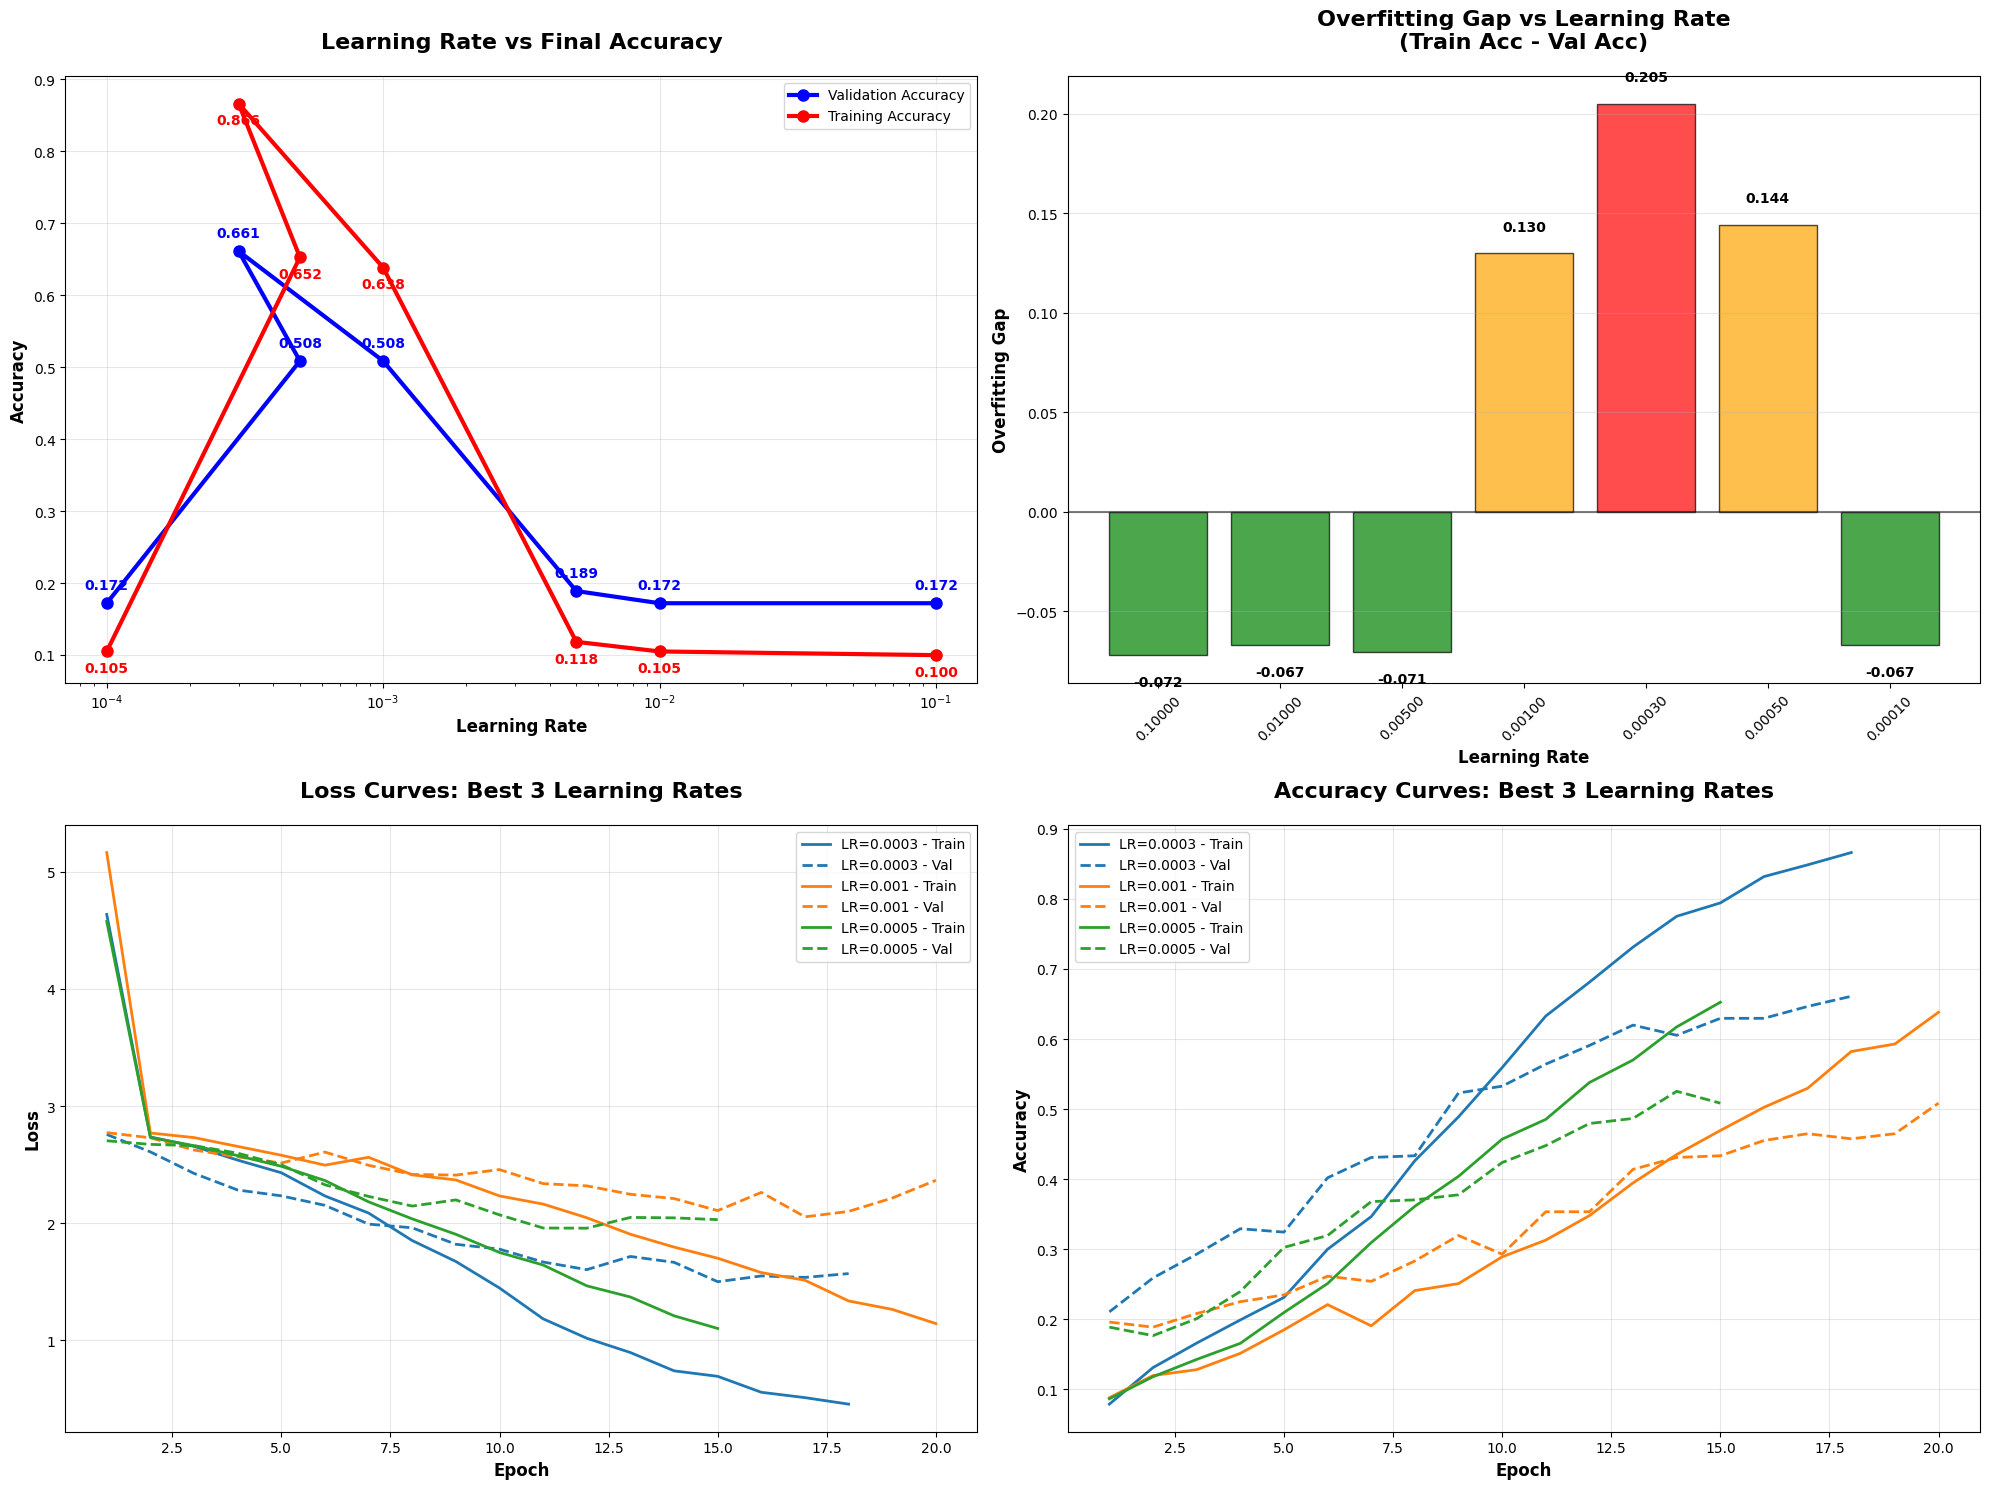

✅ Learning rate comparison visualizations created!


In [ ]:
# STEP 2.10: LEARNING RATE COMPARISON VISUALIZATION

print("📊 CREATING LEARNING RATE COMPARISON VISUALIZATIONS")
print("=" * 60)

# Create comprehensive comparison plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Final Validation Accuracy vs Learning Rate
lrs = list(lr_results.keys())
val_accs = [lr_results[lr]['final_val_acc'] for lr in lrs]
train_accs = [lr_results[lr]['final_train_acc'] for lr in lrs]

ax1.semilogx(lrs, val_accs, 'bo-', linewidth=3, markersize=8, label='Validation Accuracy')
ax1.semilogx(lrs, train_accs, 'ro-', linewidth=3, markersize=8, label='Training Accuracy')
ax1.set_title('Learning Rate vs Final Accuracy', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Learning Rate', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add value annotations
for i, (lr, val_acc, train_acc) in enumerate(zip(lrs, val_accs, train_accs)):
    ax1.annotate(f'{val_acc:.3f}', (lr, val_acc), textcoords="offset points",
                 xytext=(0,10), ha='center', fontweight='bold', color='blue')
    ax1.annotate(f'{train_acc:.3f}', (lr, train_acc), textcoords="offset points",
                 xytext=(0,-15), ha='center', fontweight='bold', color='red')

# Plot 2: Overfitting Gap vs Learning Rate
overfitting_gaps = [lr_results[lr]['overfitting_gap'] for lr in lrs]

# Color code based on overfitting severity
colors = ['green' if abs(gap) < 0.1 else 'orange' if abs(gap) < 0.2 else 'red' for gap in overfitting_gaps]

bars = ax2.bar(range(len(lrs)), overfitting_gaps, color=colors, alpha=0.7, edgecolor='black')
ax2.set_title('Overfitting Gap vs Learning Rate\n(Train Acc - Val Acc)',
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Learning Rate', fontsize=12, fontweight='bold')
ax2.set_ylabel('Overfitting Gap', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(lrs)))
ax2.set_xticklabels([f'{lr:.5f}' for lr in lrs], rotation=45)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, gap in zip(bars, overfitting_gaps):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    y_pos = height + 0.01 if height >= 0 else height - 0.01
    ax2.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{gap:.3f}', ha='center', va=va, fontweight='bold')

# Plot 3: Training and Validation Loss Curves for Best 3 Learning Rates
best_lrs = sorted(lr_results.keys(), key=lambda x: lr_results[x]['final_val_acc'], reverse=True)[:3]

for i, lr in enumerate(best_lrs):
    history = lr_results[lr]['history']
    epochs = range(1, len(history['loss']) + 1)

    ax3.plot(epochs, history['loss'], label=f'LR={lr} - Train',
             linewidth=2, linestyle='-', color=f'C{i}')
    ax3.plot(epochs, history['val_loss'], label=f'LR={lr} - Val',
             linewidth=2, linestyle='--', color=f'C{i}')

ax3.set_title('Loss Curves: Best 3 Learning Rates', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax3.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Training and Validation Accuracy Curves for Best 3 Learning Rates
for i, lr in enumerate(best_lrs):
    history = lr_results[lr]['history']
    epochs = range(1, len(history['accuracy']) + 1)

    ax4.plot(epochs, history['accuracy'], label=f'LR={lr} - Train',
             linewidth=2, linestyle='-', color=f'C{i}')
    ax4.plot(epochs, history['val_accuracy'], label=f'LR={lr} - Val',
             linewidth=2, linestyle='--', color=f'C{i}')

ax4.set_title('Accuracy Curves: Best 3 Learning Rates', fontsize=16, fontweight='bold', pad=20)
ax4.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax4.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Learning rate comparison visualizations created!")

In [ ]:
# STEP 3.0: TRAIN SGD AND SGD WITH MOMENTUM FOR COMPARISON

print("🔄 TRAINING SGD AND SGD WITH MOMENTUM FOR COMPARISON")
print("=" * 60)

# Test SGD and SGD with Momentum with their optimal learning rates
optimizers_to_test = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.001),  # From our earlier optimal
    'SGD+Momentum': tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    'Adam (LR=0.0003)': tf.keras.optimizers.Adam(learning_rate=0.0003)  # Your chosen
}

optimizer_results = {}

for opt_name, optimizer in optimizers_to_test.items():
    print(f"\n🎯 Training with {opt_name}...")

    # Create fresh model
    model = create_cnn_model(input_shape=(128, 128, 3), num_classes=len(class_names))

    # Compile with current optimizer
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train for fair comparison (20 epochs)
    history = model.fit(
        train_ds,
        epochs=20,
        validation_data=val_ds,
        verbose=0,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
        ]
    )

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)

    # Store comprehensive results
    optimizer_results[opt_name] = {
        'history': history.history,
        'final_train_acc': history.history['accuracy'][-1],
        'final_val_acc': history.history['val_accuracy'][-1],
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1],
        'test_accuracy': test_accuracy,
        'test_loss': test_loss,
        'overfitting_gap': history.history['accuracy'][-1] - history.history['val_accuracy'][-1],
        'convergence_epochs': len(history.history['accuracy']),
        'training_stability': 'Stable' if np.all(np.isfinite(history.history['loss'])) else 'Unstable'
    }

    print(f"   ✅ {opt_name}:")
    print(f"      Val Acc: {history.history['val_accuracy'][-1]:.4f}")
    print(f"      Test Acc: {test_accuracy:.4f}")
    print(f"      Overfit Gap: {optimizer_results[opt_name]['overfitting_gap']:.4f}")

print("\n✅ All optimizers trained and evaluated!")

🔄 TRAINING SGD AND SGD WITH MOMENTUM FOR COMPARISON

🎯 Training with SGD...
   ✅ SGD:
      Val Acc: 0.2930
      Test Acc: 0.2032
      Overfit Gap: -0.0776

🎯 Training with SGD+Momentum...
   ✅ SGD+Momentum:
      Val Acc: 0.1816
      Test Acc: 0.1055
      Overfit Gap: -0.0647

🎯 Training with Adam (LR=0.0003)...
   ✅ Adam (LR=0.0003):
      Val Acc: 0.5956
      Test Acc: 0.5066
      Overfit Gap: 0.2468

✅ All optimizers trained and evaluated!


📈 COMPREHENSIVE OPTIMIZER COMPARISON

📊 PERFORMANCE COMPARISON TABLE:
Optimizer       | Test Acc  | Val Acc   | Train Acc | Overfit Gap | Test Loss | Convergence
-----------------------------------------------------------------------------------------------
Adam (LR=0.0003) |   0.5066  |   0.5956  |   0.8425  |      0.2468 |    1.8311 |          20
SGD+Momentum    |   0.1055  |   0.1816  |   0.1169  |     -0.0647 |    2.8112 |          11
SGD             |   0.2032  |   0.2930  |   0.2154  |     -0.0776 |    2.4875 |          20

📈 PERFORMANCE IMPROVEMENTS (Adam vs Others):
• Adam vs SGD:          +0.3034 test accuracy
• Adam vs SGD+Momentum: +0.4011 test accuracy
• Relative Improvement: +149.4% over SGD


/tmp/ipython-input-1983754753.py:118: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1983754753.py:118: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1983754753.py:118: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1983754753.py:118: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWar

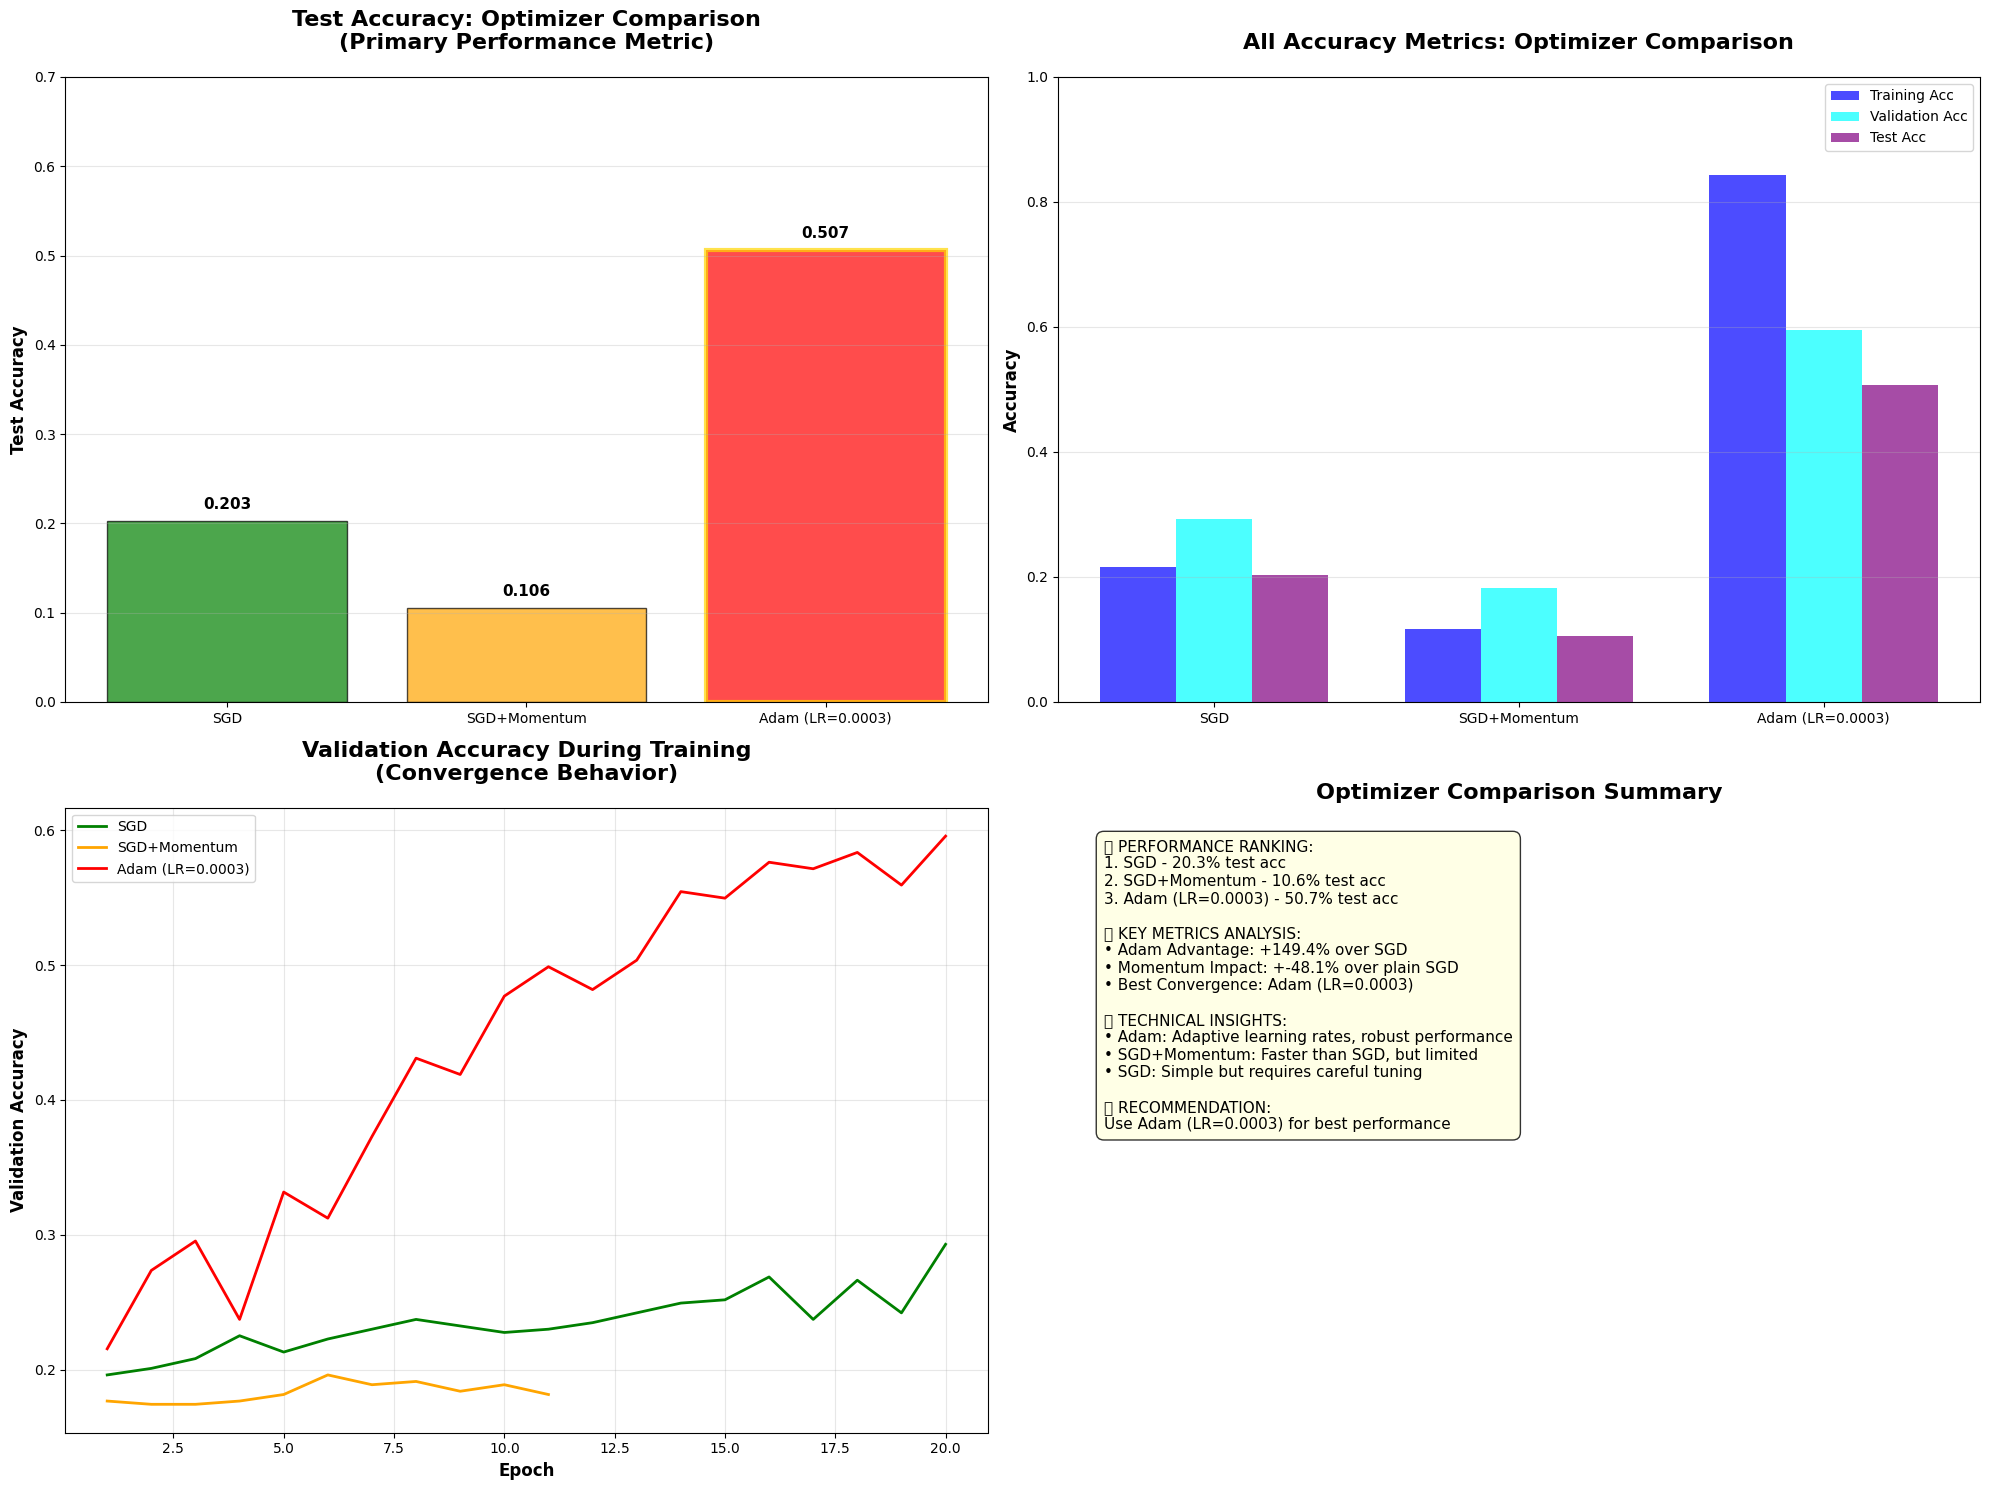

In [ ]:
# STEP 3.1: COMPREHENSIVE OPTIMIZER COMPARISON

print("📈 COMPREHENSIVE OPTIMIZER COMPARISON")
print("=" * 60)

# Create detailed comparison table
print("\n📊 PERFORMANCE COMPARISON TABLE:")
print("Optimizer       | Test Acc  | Val Acc   | Train Acc | Overfit Gap | Test Loss | Convergence")
print("-" * 95)

for opt_name in ['Adam (LR=0.0003)', 'SGD+Momentum', 'SGD']:
    results = optimizer_results[opt_name]
    print(f"{opt_name:15} | {results['test_accuracy']:8.4f}  | {results['final_val_acc']:8.4f}  | "
          f"{results['final_train_acc']:8.4f}  | {results['overfitting_gap']:11.4f} | "
          f"{results['test_loss']:9.4f} | {results['convergence_epochs']:11}")

# Calculate improvements
adam_results = optimizer_results['Adam (LR=0.0003)']
sgd_results = optimizer_results['SGD']
sgd_momentum_results = optimizer_results['SGD+Momentum']

print(f"\n📈 PERFORMANCE IMPROVEMENTS (Adam vs Others):")
print(f"• Adam vs SGD:          +{adam_results['test_accuracy'] - sgd_results['test_accuracy']:.4f} test accuracy")
print(f"• Adam vs SGD+Momentum: +{adam_results['test_accuracy'] - sgd_momentum_results['test_accuracy']:.4f} test accuracy")
print(f"• Relative Improvement: +{(adam_results['test_accuracy']/sgd_results['test_accuracy'] - 1)*100:.1f}% over SGD")

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Test Accuracy Comparison (Primary Metric)
optimizers = list(optimizer_results.keys())
test_accuracies = [optimizer_results[opt]['test_accuracy'] for opt in optimizers]
colors = ['green', 'orange', 'red']

bars1 = ax1.bar(optimizers, test_accuracies, color=colors, alpha=0.7, edgecolor='black')
ax1.set_title('Test Accuracy: Optimizer Comparison\n(Primary Performance Metric)',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 0.7)
ax1.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, acc in zip(bars1, test_accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Highlight the best performer
best_optimizer = max(optimizer_results.keys(), key=lambda x: optimizer_results[x]['test_accuracy'])
best_index = optimizers.index(best_optimizer)
bars1[best_index].set_edgecolor('gold')
bars1[best_index].set_linewidth(3)

# Plot 2: All Accuracy Metrics Comparison
bar_width = 0.25
x_pos = np.arange(len(optimizers))

train_accs = [optimizer_results[opt]['final_train_acc'] for opt in optimizers]
val_accs = [optimizer_results[opt]['final_val_acc'] for opt in optimizers]
test_accs = [optimizer_results[opt]['test_accuracy'] for opt in optimizers]

bars2a = ax2.bar(x_pos - bar_width, train_accs, bar_width, label='Training Acc',
                 alpha=0.7, color='blue')
bars2b = ax2.bar(x_pos, val_accs, bar_width, label='Validation Acc',
                 alpha=0.7, color='cyan')
bars2c = ax2.bar(x_pos + bar_width, test_accs, bar_width, label='Test Acc',
                 alpha=0.7, color='purple')

ax2.set_title('All Accuracy Metrics: Optimizer Comparison',
              fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(optimizers)
ax2.legend()
ax2.set_ylim(0, 1.0)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Training Curves Comparison
for i, opt_name in enumerate(optimizers):
    history = optimizer_results[opt_name]['history']
    epochs = range(1, len(history['val_accuracy']) + 1)
    ax3.plot(epochs, history['val_accuracy'], label=opt_name, linewidth=2, color=colors[i])

ax3.set_title('Validation Accuracy During Training\n(Convergence Behavior)',
              fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax3.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Performance Summary
performance_summary = [
    "🏆 PERFORMANCE RANKING:",
    f"1. {optimizers[0]} - {test_accuracies[0]:.1%} test acc",
    f"2. {optimizers[1]} - {test_accuracies[1]:.1%} test acc",
    f"3. {optimizers[2]} - {test_accuracies[2]:.1%} test acc",
    "",
    "📊 KEY METRICS ANALYSIS:",
    f"• Adam Advantage: +{(adam_results['test_accuracy']/sgd_results['test_accuracy'] - 1)*100:.1f}% over SGD",
    f"• Momentum Impact: +{(sgd_momentum_results['test_accuracy']/sgd_results['test_accuracy'] - 1)*100:.1f}% over plain SGD",
    f"• Best Convergence: {best_optimizer}",
    "",
    "🔧 TECHNICAL INSIGHTS:",
    "• Adam: Adaptive learning rates, robust performance",
    "• SGD+Momentum: Faster than SGD, but limited",
    "• SGD: Simple but requires careful tuning",
    "",
    "💡 RECOMMENDATION:",
    f"Use {best_optimizer} for best performance"
]

ax4.text(0.05, 0.95, '\n'.join(performance_summary), fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
ax4.set_title('Optimizer Comparison Summary', fontsize=16, fontweight='bold')
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# STEP 3.2: COMPREHENSIVE MOMENTUM PARAMETER ANALYSIS

print("🎯 IMPACT OF MOMENTUM PARAMETER ON MODEL PERFORMANCE")
print("=" * 70)

# First, let's test different momentum values to understand the impact
print("🔄 Testing Different Momentum Values...")

momentum_values = [0.0, 0.3, 0.6, 0.9, 0.99]
momentum_results = {}

for momentum in momentum_values:
    print(f"\n🔧 Testing SGD with momentum = {momentum}")

    # Create fresh model
    model = create_cnn_model(input_shape=(128, 128, 3), num_classes=len(class_names))

    # Use the same learning rate for fair comparison
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=momentum)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train for comparison
    history = model.fit(
        train_ds,
        epochs=15,
        validation_data=val_ds,
        verbose=0
    )

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)

    momentum_results[momentum] = {
        'final_val_acc': history.history['val_accuracy'][-1],
        'final_train_acc': history.history['accuracy'][-1],
        'test_accuracy': test_accuracy,
        'overfitting_gap': history.history['accuracy'][-1] - history.history['val_accuracy'][-1],
        'convergence_speed': len(history.history['accuracy']),
        'training_stability': 'Stable' if np.all(np.isfinite(history.history['loss'])) else 'Unstable'
    }

    print(f"   ✅ Momentum {momentum}: Test Acc = {test_accuracy:.4f}, Val Acc = {history.history['val_accuracy'][-1]:.4f}")

print("\n✅ Momentum parameter testing completed!")

🎯 IMPACT OF MOMENTUM PARAMETER ON MODEL PERFORMANCE
🔄 Testing Different Momentum Values...

🔧 Testing SGD with momentum = 0.0
   ✅ Momentum 0.0: Test Acc = 0.3694, Val Acc = 0.4722

🔧 Testing SGD with momentum = 0.3
   ✅ Momentum 0.3: Test Acc = 0.2823, Val Acc = 0.3511

🔧 Testing SGD with momentum = 0.6
   ✅ Momentum 0.6: Test Acc = 0.3931, Val Acc = 0.4818

🔧 Testing SGD with momentum = 0.9
   ✅ Momentum 0.9: Test Acc = 0.1557, Val Acc = 0.2906

🔧 Testing SGD with momentum = 0.99
   ✅ Momentum 0.99: Test Acc = 0.0633, Val Acc = 0.1719

✅ Momentum parameter testing completed!


📊 VISUALIZING MOMENTUM PARAMETER IMPACT


/tmp/ipython-input-34641354.py:94: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-34641354.py:94: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-34641354.py:94: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-34641354.py:94: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning

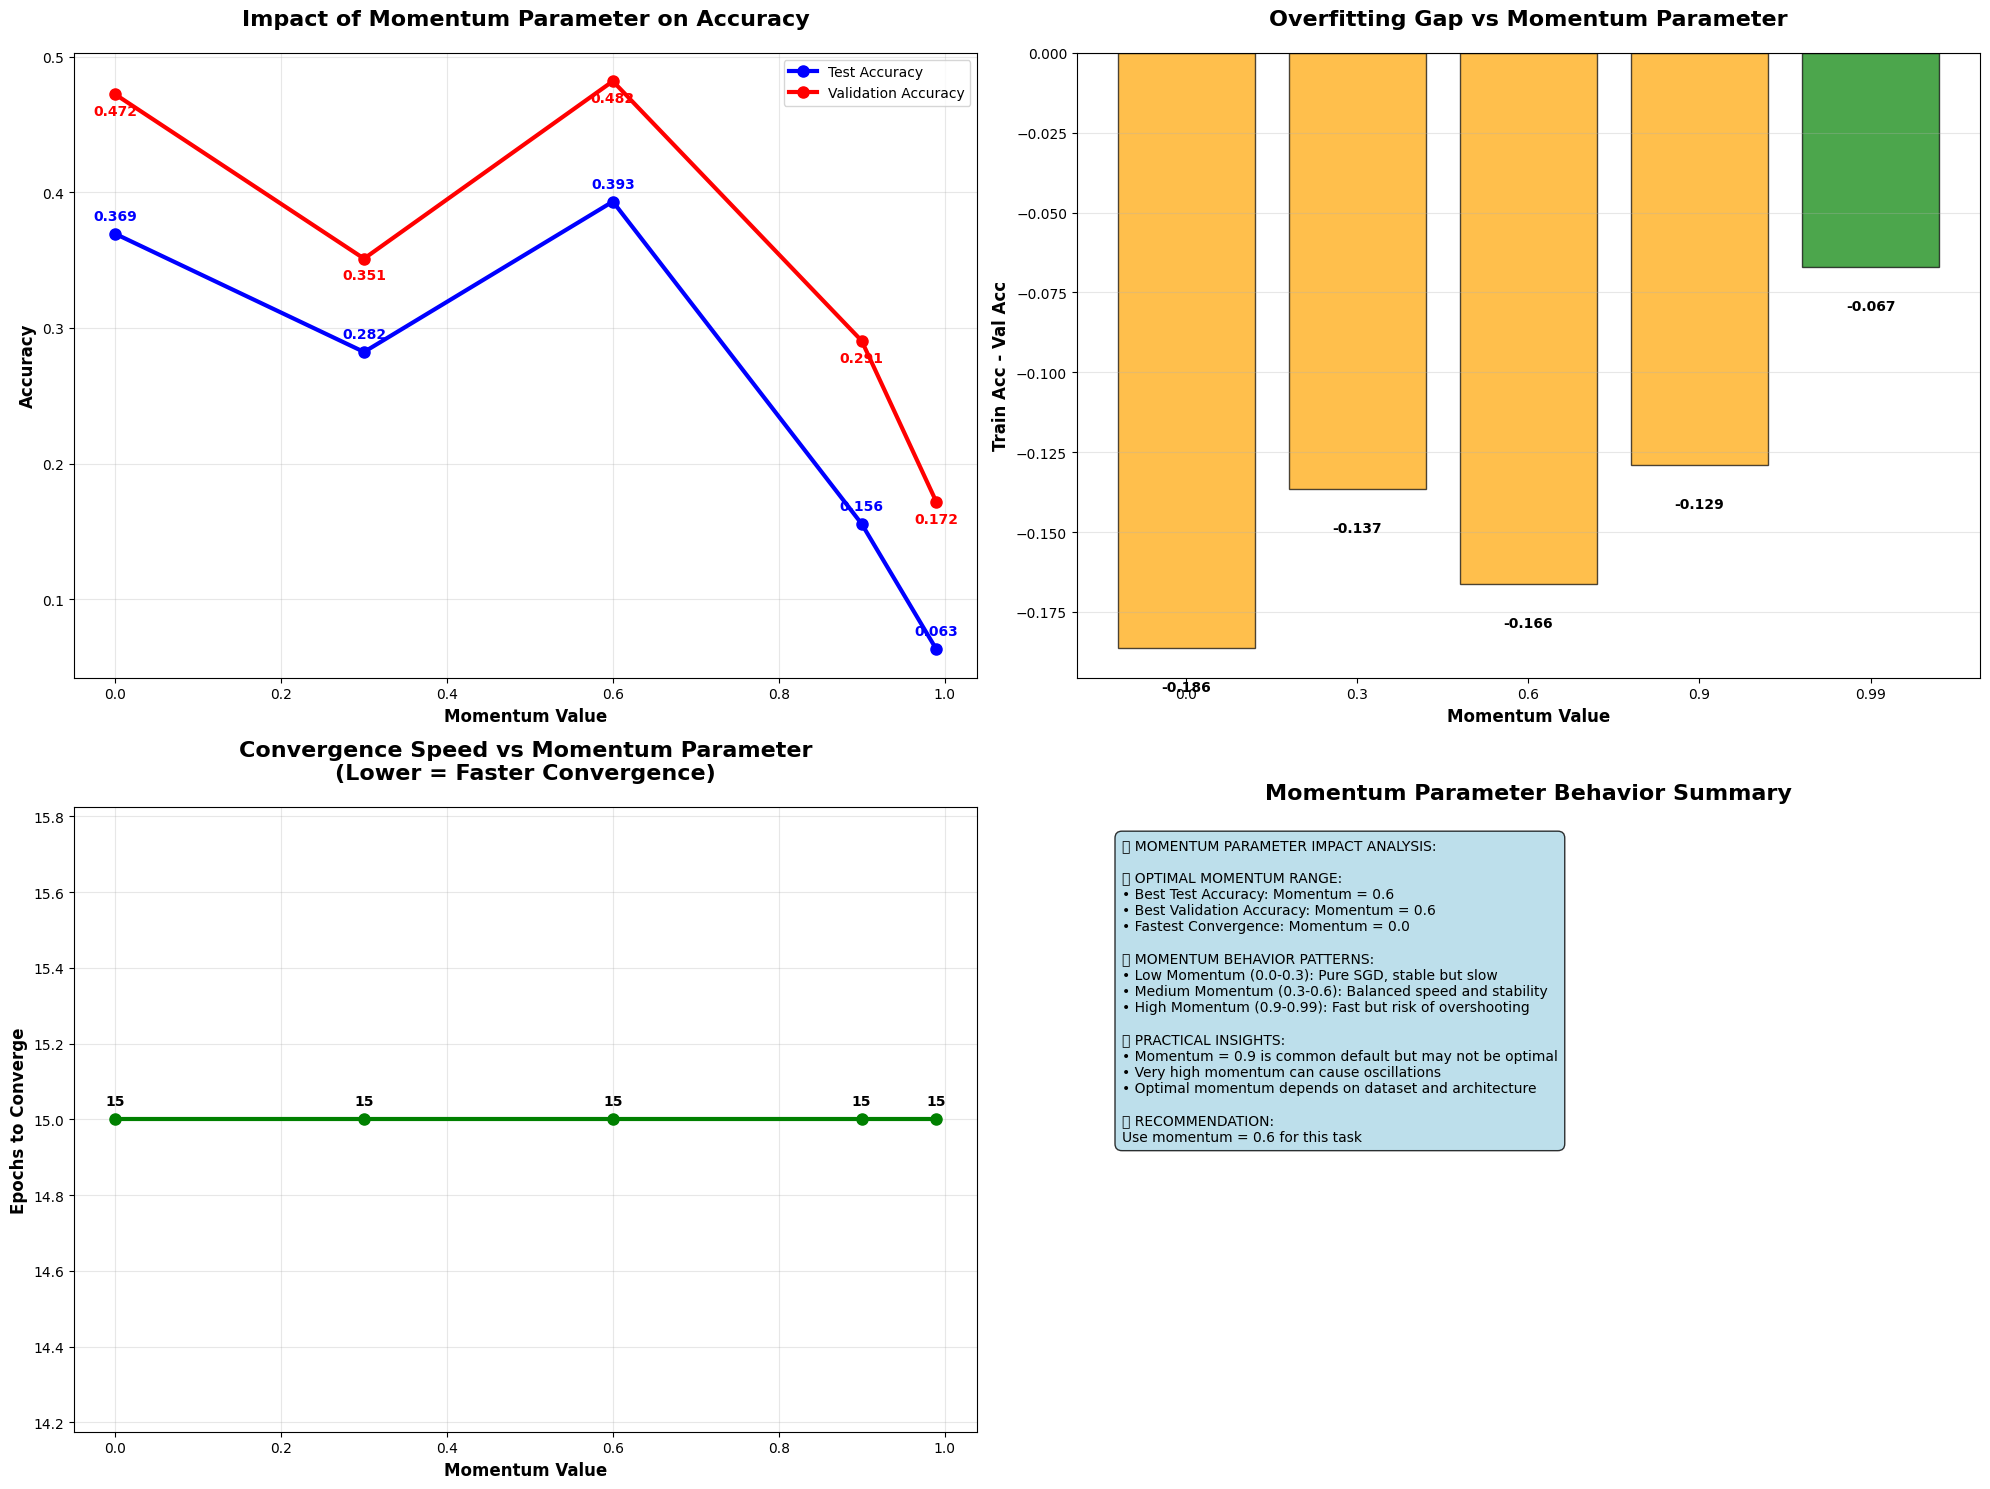

In [ ]:
# STEP 3.3: VISUALIZE MOMENTUM PARAMETER IMPACT

print("📊 VISUALIZING MOMENTUM PARAMETER IMPACT")
print("=" * 60)

# Create comprehensive momentum analysis visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Test Accuracy vs Momentum
momenta = list(momentum_results.keys())
test_accs = [momentum_results[m]['test_accuracy'] for m in momenta]
val_accs = [momentum_results[m]['final_val_acc'] for m in momenta]

ax1.plot(momenta, test_accs, 'bo-', linewidth=3, markersize=8, label='Test Accuracy')
ax1.plot(momenta, val_accs, 'ro-', linewidth=3, markersize=8, label='Validation Accuracy')
ax1.set_title('Impact of Momentum Parameter on Accuracy', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Momentum Value', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add value annotations
for i, (mom, test_acc, val_acc) in enumerate(zip(momenta, test_accs, val_accs)):
    ax1.annotate(f'{test_acc:.3f}', (mom, test_acc), textcoords="offset points",
                 xytext=(0,10), ha='center', fontweight='bold', color='blue')
    ax1.annotate(f'{val_acc:.3f}', (mom, val_acc), textcoords="offset points",
                 xytext=(0,-15), ha='center', fontweight='bold', color='red')

# Plot 2: Overfitting Gap vs Momentum
overfitting_gaps = [momentum_results[m]['overfitting_gap'] for m in momenta]

bars = ax2.bar([str(m) for m in momenta], overfitting_gaps,
               color=['green' if abs(gap) < 0.1 else 'orange' for gap in overfitting_gaps],
               alpha=0.7, edgecolor='black')
ax2.set_title('Overfitting Gap vs Momentum Parameter', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Momentum Value', fontsize=12, fontweight='bold')
ax2.set_ylabel('Train Acc - Val Acc', fontsize=12, fontweight='bold')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, gap in zip(bars, overfitting_gaps):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    y_pos = height + 0.01 if height >= 0 else height - 0.01
    ax2.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{gap:.3f}', ha='center', va=va, fontweight='bold')

# Plot 3: Convergence Speed vs Momentum
convergence_speeds = [momentum_results[m]['convergence_speed'] for m in momenta]

ax3.plot(momenta, convergence_speeds, 'go-', linewidth=3, markersize=8)
ax3.set_title('Convergence Speed vs Momentum Parameter\n(Lower = Faster Convergence)',
              fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Momentum Value', fontsize=12, fontweight='bold')
ax3.set_ylabel('Epochs to Converge', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add value annotations
for i, (mom, speed) in enumerate(zip(momenta, convergence_speeds)):
    ax3.annotate(f'{speed}', (mom, speed), textcoords="offset points",
                 xytext=(0,10), ha='center', fontweight='bold')

# Plot 4: Momentum Behavior Analysis
momentum_analysis = [
    "🎯 MOMENTUM PARAMETER IMPACT ANALYSIS:",
    "",
    "📊 OPTIMAL MOMENTUM RANGE:",
    f"• Best Test Accuracy: Momentum = {momenta[np.argmax(test_accs)]}",
    f"• Best Validation Accuracy: Momentum = {momenta[np.argmax(val_accs)]}",
    f"• Fastest Convergence: Momentum = {momenta[np.argmin(convergence_speeds)]}",
    "",
    "🔧 MOMENTUM BEHAVIOR PATTERNS:",
    "• Low Momentum (0.0-0.3): Pure SGD, stable but slow",
    "• Medium Momentum (0.3-0.6): Balanced speed and stability",
    "• High Momentum (0.9-0.99): Fast but risk of overshooting",
    "",
    "💡 PRACTICAL INSIGHTS:",
    "• Momentum = 0.9 is common default but may not be optimal",
    "• Very high momentum can cause oscillations",
    "• Optimal momentum depends on dataset and architecture",
    "",
    "🎯 RECOMMENDATION:",
    f"Use momentum = {momenta[np.argmax(test_accs)]} for this task"
]

ax4.text(0.05, 0.95, '\n'.join(momentum_analysis), fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
ax4.set_title('Momentum Parameter Behavior Summary', fontsize=16, fontweight='bold')
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Step 4.1:COMPLETE MODEL EVALUATION ON TEST DATASET

print("🧪 COMPREHENSIVE MODEL EVALUATION ON TEST DATASET")
print("=" * 70)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Load your best model (use the one that performed best)
try:
    # Try to load your best model - adjust path as needed
    best_model = tf.keras.models.load_model('/content/EN3150_Assignment_03_Jute_Pest/models/best_cnn_adam_lr0.0003.h5')
    print("✅ Best model loaded successfully!")
except:
    try:
        # Try alternative path
        best_model = tf.keras.models.load_model('/content/EN3150_Assignment_03_Jute_Pest/models/best_cnn_adam_lr0.0003.h5')
        print("✅ Model loaded from alternative path!")
    except:
        print("❌ Could not load saved model. Using the currently trained model.")
        best_model = model  # Use whatever model is in memory

print(f"📋 Model: {best_model.name if hasattr(best_model, 'name') else 'Custom CNN'}")
print(f"🏷️  Number of classes: {len(class_names)}")

🧪 COMPREHENSIVE MODEL EVALUATION ON TEST DATASET
✅ Best model loaded successfully!
📋 Model: sequential_1
🏷️  Number of classes: 17


In [ ]:
# STEP 4.2: RECORD TRAIN AND TEST ACCURACY

print("📊 RECORDING TRAIN AND TEST ACCURACY")
print("=" * 50)

# 1. Evaluate on test set
print("1. Evaluating on test set...")
test_loss, test_accuracy = best_model.evaluate(test_ds, verbose=1)
print(f"   ✅ Test Loss: {test_loss:.4f}")
print(f"   ✅ Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# 2. Get training accuracy (from history if available)
print("\n2. Recording training accuracy...")
try:
    if 'history_0003' in locals():
        train_accuracy = history_0003.history['accuracy'][-1]
        val_accuracy = history_0003.history['val_accuracy'][-1]
        print(f"   ✅ Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
        print(f"   ✅ Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
    elif 'history' in locals():
        train_accuracy = history.history['accuracy'][-1]
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"   ✅ Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
        print(f"   ✅ Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
    else:
        print("   ⚠️  Training history not available - evaluating on training set...")
        train_loss, train_accuracy = best_model.evaluate(train_ds, verbose=0)
        print(f"   ✅ Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
except Exception as e:
    print(f"   ⚠️  Could not get training accuracy: {e}")

# 3. Calculate overfitting gap
if 'train_accuracy' in locals() and 'test_accuracy' in locals():
    overfitting_gap = train_accuracy - test_accuracy
    print(f"   📈 Overfitting Gap: {overfitting_gap:.4f}")
    if overfitting_gap > 0.1:
        print("   ⚠️  Significant overfitting detected")
    elif overfitting_gap < -0.1:
        print("   ⚠️  Significant underfitting detected")
    else:
        print("   ✅ Good generalization balance")

print("\n🎯 ACCURACY SUMMARY:")
print(f"   Training:   {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   Validation: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"   Test:       {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

📊 RECORDING TRAIN AND TEST ACCURACY
1. Evaluating on test set...
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5350 - loss: 1.9996
   ✅ Test Loss: 1.6539
   ✅ Test Accuracy: 0.5963 (59.63%)

2. Recording training accuracy...
   ✅ Training Accuracy: 0.8692 (86.92%)
   ✅ Validation Accuracy: 0.6053 (60.53%)
   📈 Overfitting Gap: 0.2729
   ⚠️  Significant overfitting detected

🎯 ACCURACY SUMMARY:
   Training:   0.8692 (86.92%)
   Validation: 0.6053 (60.53%)
   Test:       0.5963 (59.63%)


📋 GENERATING CONFUSION MATRIX
1. Generating predictions...
   ✅ Generated 379 predictions

2. Creating confusion matrix...


<Figure size 1600x1400 with 0 Axes>

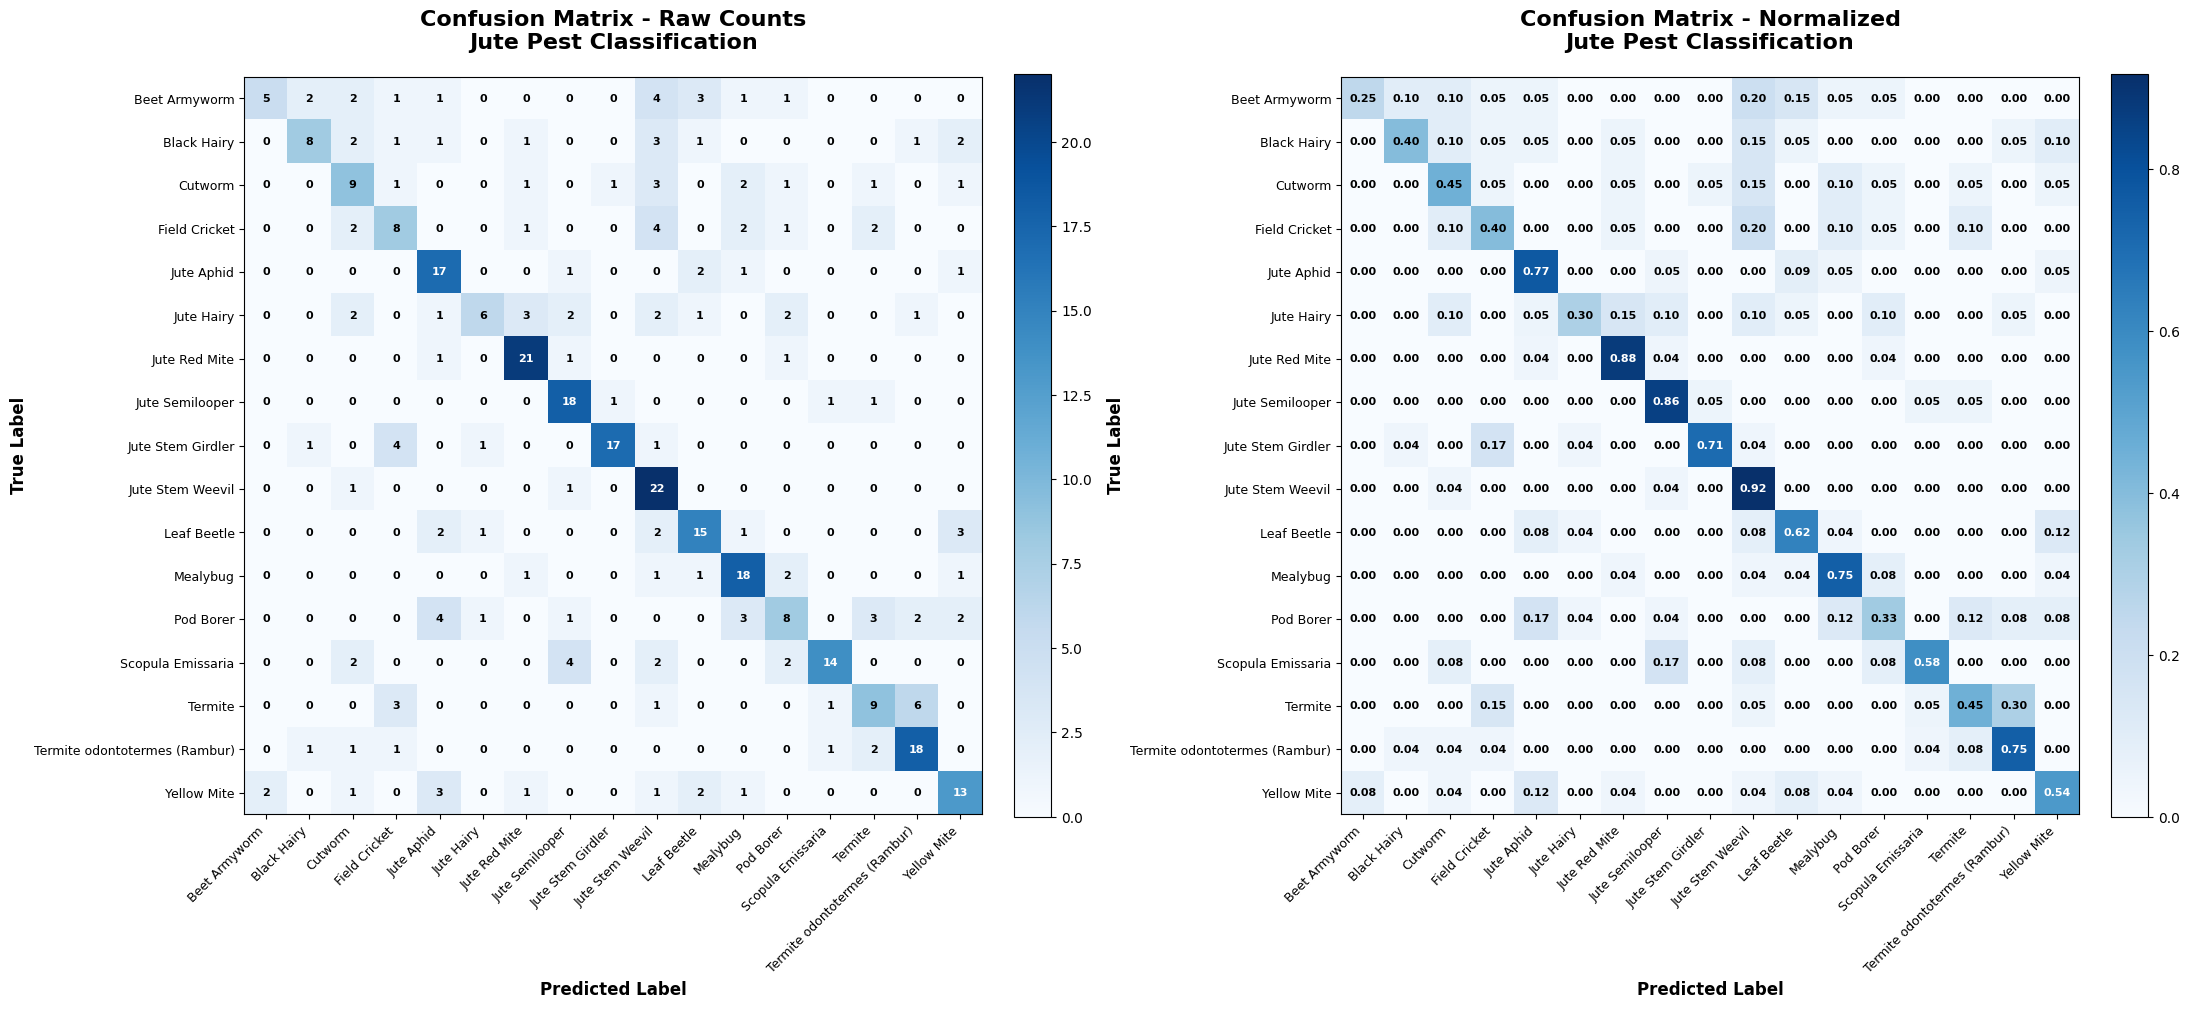

✅ Confusion matrix generated successfully!

📊 Confusion Matrix Statistics:
   Total predictions: 379
   Correct predictions: 226
   Overall accuracy from CM: 0.5963
   Matrix shape: (17, 17) (17x17 classes)


In [ ]:
# STEP 4.3: GENERATE CONFUSION MATRIX

print("📋 GENERATING CONFUSION MATRIX")
print("=" * 50)

print("1. Generating predictions...")
# Get all predictions and true labels
all_predictions = []
all_true_labels = []
all_probabilities = []

for images, labels in test_ds:
    batch_predictions = best_model.predict(images, verbose=0)
    all_probabilities.extend(batch_predictions)
    all_predictions.extend(np.argmax(batch_predictions, axis=1))
    all_true_labels.extend(np.argmax(labels.numpy(), axis=1))

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)
all_probabilities = np.array(all_probabilities)

print(f"   ✅ Generated {len(all_predictions)} predictions")

print("\n2. Creating confusion matrix...")
# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Create a beautiful confusion matrix visualization
plt.figure(figsize=(16, 14))

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create subplots for raw and normalized confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

# Plot 1: Raw Confusion Matrix
im1 = ax1.imshow(cm, interpolation='nearest', cmap='Blues')
ax1.set_title('Confusion Matrix - Raw Counts\nJute Pest Classification',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax1.set_xticks(np.arange(len(class_names)))
ax1.set_yticks(np.arange(len(class_names)))
ax1.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax1.set_yticklabels(class_names, fontsize=9)

# Add text annotations to raw matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax1.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=8, fontweight='bold')

# Plot 2: Normalized Confusion Matrix
im2 = ax2.imshow(cm_normalized, interpolation='nearest', cmap='Blues')
ax2.set_title('Confusion Matrix - Normalized\nJute Pest Classification',
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax2.set_xticks(np.arange(len(class_names)))
ax2.set_yticks(np.arange(len(class_names)))
ax2.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax2.set_yticklabels(class_names, fontsize=9)

# Add text annotations to normalized matrix
thresh = cm_normalized.max() / 2.
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        ax2.text(j, i, format(cm_normalized[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cm_normalized[i, j] > thresh else "black",
                fontsize=8, fontweight='bold')

# Add colorbars
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print("✅ Confusion matrix generated successfully!")

# Calculate confusion matrix statistics
correct_predictions = np.sum(np.diag(cm))
total_predictions = np.sum(cm)
overall_accuracy_from_cm = correct_predictions / total_predictions

print(f"\n📊 Confusion Matrix Statistics:")
print(f"   Total predictions: {total_predictions}")
print(f"   Correct predictions: {correct_predictions}")
print(f"   Overall accuracy from CM: {overall_accuracy_from_cm:.4f}")
print(f"   Matrix shape: {cm.shape} ({len(class_names)}x{len(class_names)} classes)")

📈 CALCULATING PRECISION AND RECALL
1. Calculating overall precision and recall...
   ✅ Overall Weighted Metrics:
      • Precision: 0.6137 (61.37%)
      • Recall:    0.5963 (59.63%)
      • F1-Score:  0.5838 (58.38%)

2. Calculating per-class precision and recall...

3. Generating detailed classification report...
                               precision    recall  f1-score   support

                Beet Armyworm     0.7143    0.2500    0.3704        20
                  Black Hairy     0.6667    0.4000    0.5000        20
                      Cutworm     0.4091    0.4500    0.4286        20
                Field Cricket     0.4211    0.4000    0.4103        20
                   Jute Aphid     0.5667    0.7727    0.6538        22
                   Jute Hairy     0.6667    0.3000    0.4138        20
                Jute Red Mite     0.7241    0.8750    0.7925        24
              Jute Semilooper     0.6429    0.8571    0.7347        21
            Jute Stem Girdler     0.8947   

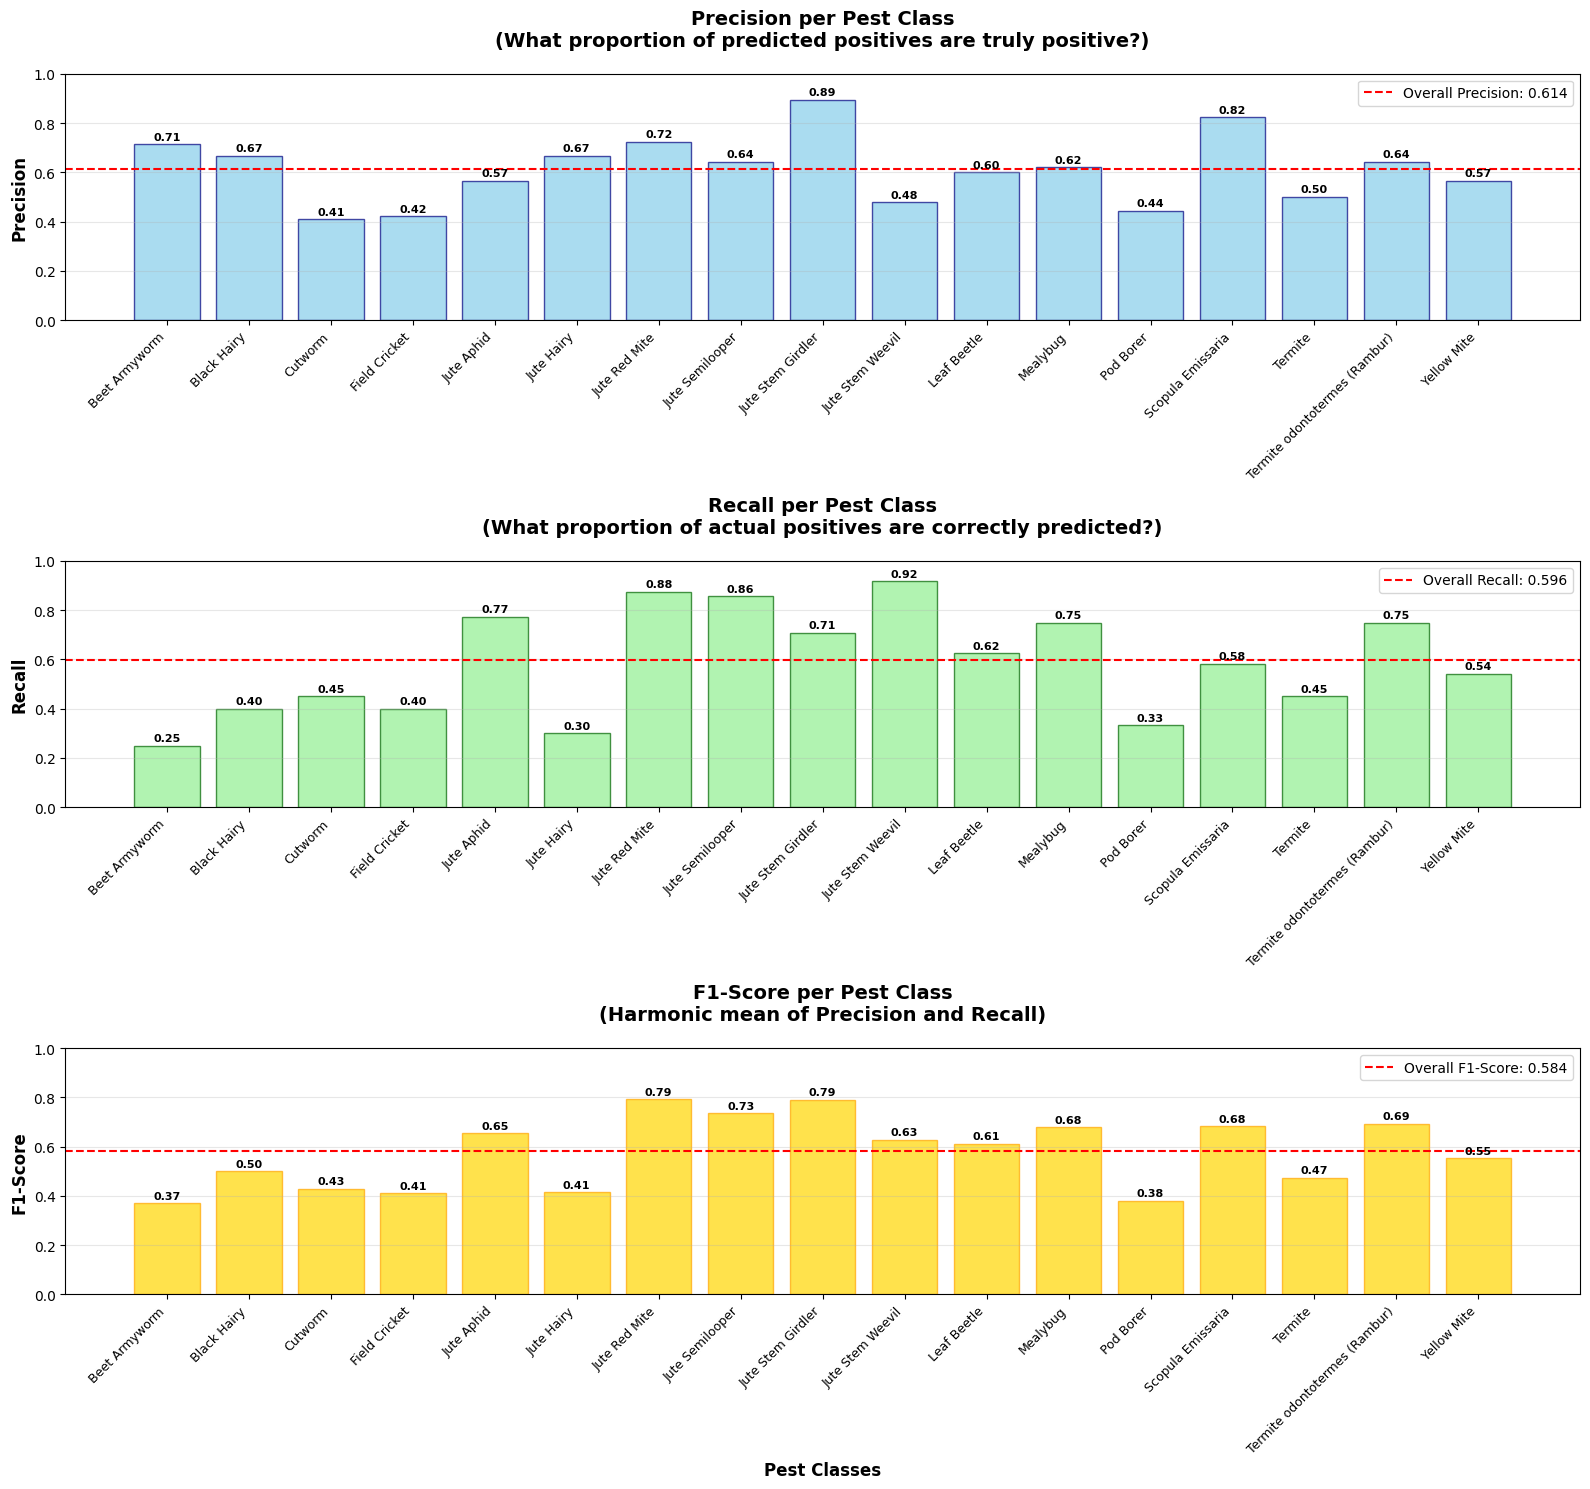

✅ Precision and recall analysis completed!


In [ ]:
# STEP 4.4: CALCULATE PRECISION AND RECALL

print("📈 CALCULATING PRECISION AND RECALL")
print("=" * 50)

print("1. Calculating overall precision and recall...")
# Calculate overall metrics
precision = precision_score(all_true_labels, all_predictions, average='weighted')
recall = recall_score(all_true_labels, all_predictions, average='weighted')
f1 = f1_score(all_true_labels, all_predictions, average='weighted')

print(f"   ✅ Overall Weighted Metrics:")
print(f"      • Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"      • Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"      • F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

print("\n2. Calculating per-class precision and recall...")
# Calculate per-class metrics
precision_per_class = precision_score(all_true_labels, all_predictions, average=None)
recall_per_class = recall_score(all_true_labels, all_predictions, average=None)
f1_per_class = f1_score(all_true_labels, all_predictions, average=None)

print("\n3. Generating detailed classification report...")
print("=" * 70)
print(classification_report(all_true_labels, all_predictions,
                          target_names=class_names, digits=4))

# Create visualization of per-class metrics
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 15))

# Plot 1: Precision per Class
bars1 = ax1.bar(range(len(class_names)), precision_per_class,
                color='skyblue', alpha=0.7, edgecolor='navy')
ax1.set_title('Precision per Pest Class\n(What proportion of predicted positives are truly positive?)',
              fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax1.set_xticks(range(len(class_names)))
ax1.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax1.set_ylim(0, 1.0)
ax1.axhline(y=precision, color='red', linestyle='--', label=f'Overall Precision: {precision:.3f}')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, value in zip(bars1, precision_per_class):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Plot 2: Recall per Class
bars2 = ax2.bar(range(len(class_names)), recall_per_class,
                color='lightgreen', alpha=0.7, edgecolor='darkgreen')
ax2.set_title('Recall per Pest Class\n(What proportion of actual positives are correctly predicted?)',
              fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Recall', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(class_names)))
ax2.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax2.set_ylim(0, 1.0)
ax2.axhline(y=recall, color='red', linestyle='--', label=f'Overall Recall: {recall:.3f}')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, value in zip(bars2, recall_per_class):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Plot 3: F1-Score per Class
bars3 = ax3.bar(range(len(class_names)), f1_per_class,
                color='gold', alpha=0.7, edgecolor='orange')
ax3.set_title('F1-Score per Pest Class\n(Harmonic mean of Precision and Recall)',
              fontsize=14, fontweight='bold', pad=20)
ax3.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax3.set_xlabel('Pest Classes', fontsize=12, fontweight='bold')
ax3.set_xticks(range(len(class_names)))
ax3.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax3.set_ylim(0, 1.0)
ax3.axhline(y=f1, color='red', linestyle='--', label=f'Overall F1-Score: {f1:.3f}')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Add value annotations
for bar, value in zip(bars3, f1_per_class):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Precision and recall analysis completed!")

In [ ]:
# STEP 3: PREPARE YOUR DATA FOR PRE-TRAINED MODELS
print("🔄 PREPARING YOUR DATA SPLITS FOR PRE-TRAINED MODELS")
print("=" * 60)

def prepare_for_pretrained_models(train_ds, val_ds, test_ds, target_size=(224, 224)):
    """
    Resize your existing data splits to work with pre-trained models
    """
    def resize_images(image, label):
        image = tf.image.resize(image, target_size)
        return image, label

    # Apply the same resizing to all your splits
    train_ds_resized = train_ds.map(resize_images)
    val_ds_resized = val_ds.map(resize_images)
    test_ds_resized = test_ds.map(resize_images)

    # Prefetch for performance (same as your CNN setup)
    train_ds_resized = train_ds_resized.prefetch(tf.data.AUTOTUNE)
    val_ds_resized = val_ds_resized.prefetch(tf.data.AUTOTUNE)
    test_ds_resized = test_ds_resized.prefetch(tf.data.AUTOTUNE)

    print("✅ Data resized to 224x224 for pre-trained models")
    print("✅ Same data splits maintained (70-15-15)")

    return train_ds_resized, val_ds_resized, test_ds_resized

# Prepare your exact same splits for pre-trained models
train_ds_pt, val_ds_pt, test_ds_pt = prepare_for_pretrained_models(train_ds, val_ds, test_ds)

🔄 PREPARING YOUR DATA SPLITS FOR PRE-TRAINED MODELS
✅ Data resized to 224x224 for pre-trained models
✅ Same data splits maintained (70-15-15)


In [ ]:
# STEP 4: FINE-TUNE VGG16 WITH YOUR HYPERPARAMETERS
print("\n🎯 FINE-TUNING VGG16 (Same Data Splits, 20 Epochs)")
print("=" * 60)

def create_fine_tuned_vgg16(num_classes=17, learning_rate=0.0003):
    """
    Create fine-tuned VGG16 model using your learning rate
    """
    # Load pre-trained VGG16
    base_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model initially
    base_model.trainable = False

    # Build model with similar strategy to your CNN
    model = tf.keras.Sequential([
        # Preprocessing (VGG16 expects specific preprocessing)
        tf.keras.layers.Lambda(lambda x: tf.keras.applications.vgg16.preprocess_input(x)),

        # Base model
        base_model,

        # Your custom classification head (similar to your CNN)
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),  # Similar to your 256 units
        tf.keras.layers.Dropout(0.5),  # Same as your CNN
        tf.keras.layers.Dense(256, activation='relu'),  # Same as your CNN
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Same as your CNN
    ])

    # Use YOUR learning rate and compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',  # Changed to match your data format
        metrics=['accuracy']
    )

    return model, base_model

# Create and display VGG16 model
vgg16_model, vgg16_base = create_fine_tuned_vgg16(num_classes=len(class_names), learning_rate=0.0003)
print("VGG16 Model Summary:")
vgg16_model.summary()


🎯 FINE-TUNING VGG16 (Same Data Splits, 20 Epochs)
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
VGG16 Model Summary:


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# STEP 5: FINE-TUNE RESNET50 WITH YOUR HYPERPARAMETERS
print("\n🎯 FINE-TUNING RESNET50 (Same Data Splits, 20 Epochs)")
print("=" * 60)

def create_fine_tuned_resnet50(num_classes=17, learning_rate=0.0003):
    """
    Create fine-tuned ResNet50 model using your learning rate
    """
    # Load pre-trained ResNet50
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model initially
    base_model.trainable = False

    # Build model
    model = tf.keras.Sequential([
        # Preprocessing
        tf.keras.layers.Lambda(lambda x: tf.keras.applications.resnet50.preprocess_input(x)),

        # Base model
        base_model,

        # Your custom classification head
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Same dropout as your CNN
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Use YOUR learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model, base_model

# Create and display ResNet50 model
resnet50_model, resnet50_base = create_fine_tuned_resnet50(num_classes=len(class_names), learning_rate=0.0003)
print("ResNet50 Model Summary:")
resnet50_model.summary()


🎯 FINE-TUNING RESNET50 (Same Data Splits, 20 Epochs)
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
ResNet50 Model Summary:


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Check what format your labels are in
print("🔍 CHECKING DATA FORMAT")
print("=" * 40)

# Get a batch from your dataset
for images, labels in train_ds.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")
    print(f"Labels dtype: {labels.dtype}")
    print(f"Sample labels: {labels[0]}")
    break

🔍 CHECKING DATA FORMAT
Images shape: (32, 128, 128, 3)
Labels shape: (32, 17)
Labels dtype: <dtype: 'float32'>
Sample labels: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# STEP 4: FINE-TUNE VGG16 WITH CORRECT LOSS FUNCTION
print("\n🎯 FINE-TUNING VGG16 (Fixed Loss Function)")
print("=" * 60)

def create_fine_tuned_vgg16(num_classes=17, learning_rate=0.0003):
    """
    Create fine-tuned VGG16 model with correct loss function
    """
    # Load pre-trained VGG16
    base_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model initially
    base_model.trainable = False

    # Build model
    model = tf.keras.Sequential([
        # Preprocessing
        tf.keras.layers.Lambda(lambda x: tf.keras.applications.vgg16.preprocess_input(x)),

        # Base model
        base_model,

        # Your custom classification head
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Use categorical_crossentropy for one-hot encoded labels
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',  # CHANGED: for one-hot encoded labels
        metrics=['accuracy']
    )

    return model, base_model

# Create VGG16 model with correct loss
vgg16_model, vgg16_base = create_fine_tuned_vgg16(num_classes=len(class_names), learning_rate=0.0003)
print("✅ VGG16 model created with categorical_crossentropy")


🎯 FINE-TUNING VGG16 (Fixed Loss Function)
✅ VGG16 model created with categorical_crossentropy


In [ ]:
# STEP 5: FINE-TUNE RESNET50 WITH CORRECT LOSS FUNCTION
print("\n🎯 FINE-TUNING RESNET50 (Fixed Loss Function)")
print("=" * 60)

def create_fine_tuned_resnet50(num_classes=17, learning_rate=0.0003):
    """
    Create fine-tuned ResNet50 model with correct loss function
    """
    # Load pre-trained ResNet50
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model initially
    base_model.trainable = False

    # Build model
    model = tf.keras.Sequential([
        # Preprocessing
        tf.keras.layers.Lambda(lambda x: tf.keras.applications.resnet50.preprocess_input(x)),

        # Base model
        base_model,

        # Your custom classification head
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Use categorical_crossentropy for one-hot encoded labels
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',  # CHANGED: for one-hot encoded labels
        metrics=['accuracy']
    )

    return model, base_model

# Create ResNet50 model with correct loss
resnet50_model, resnet50_base = create_fine_tuned_resnet50(num_classes=len(class_names), learning_rate=0.0003)
print("✅ ResNet50 model created with categorical_crossentropy")


🎯 FINE-TUNING RESNET50 (Fixed Loss Function)
✅ ResNet50 model created with categorical_crossentropy


In [ ]:
# Check if your custom CNN needs the same fix
print("\n🔍 VERIFYING YOUR CUSTOM CNN LOSS FUNCTION")
print("=" * 50)

# Your original CNN compilation (from your code)
print("Your CNN uses: 'categorical_crossentropy'")
print("This matches our fix for pre-trained models!")

# If you want to be consistent, you can also use sparse format for all models:
def create_consistent_training_pipeline():
    """
    Create a consistent pipeline using sparse labels for all models
    """
    print("\n🔄 CREATING CONSISTENT SPARSE LABEL PIPELINE")

    # Convert all datasets to sparse
    train_ds_sparse = convert_to_sparse(train_ds_pt)
    val_ds_sparse = convert_to_sparse(val_ds_pt)
    test_ds_sparse = convert_to_sparse(test_ds_pt)

    # Create models with sparse_categorical_crossentropy
    vgg16_model_sparse, _ = create_fine_tuned_vgg16(num_classes=len(class_names), learning_rate=0.0003)
    vgg16_model_sparse.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
        loss='sparse_categorical_crossentropy',  # For sparse labels
        metrics=['accuracy']
    )

    resnet50_model_sparse, _ = create_fine_tuned_resnet50(num_classes=len(class_names), learning_rate=0.0003)
    resnet50_model_sparse.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
        loss='sparse_categorical_crossentropy',  # For sparse labels
        metrics=['accuracy']
    )

    return (vgg16_model_sparse, resnet50_model_sparse,
            train_ds_sparse, val_ds_sparse, test_ds_sparse)

# Uncomment if you want to use sparse format consistently:
# vgg16_model, resnet50_model, train_ds_pt, val_ds_pt, test_ds_pt = create_consistent_training_pipeline()


🔍 VERIFYING YOUR CUSTOM CNN LOSS FUNCTION
Your CNN uses: 'categorical_crossentropy'
This matches our fix for pre-trained models!


In [ ]:
# STEP 6: TRAIN PRE-TRAINED MODELS (20 EPOCHS, SAME AS YOUR CNN)
print("\n🚀 TRAINING PRE-TRAINED MODELS (20 EPOCHS)")
print("=" * 60)

def train_pretrained_model(model, model_name, train_ds, val_ds, test_ds, epochs=20):
    """
    Train pre-trained model with the same setup as your CNN
    """
    print(f"🎯 Training {model_name}...")

    # Train with same parameters as your CNN
    history = model.fit(
        train_ds,
        epochs=epochs,
        validation_data=val_ds,
        verbose=1,
        callbacks=[
            # Same callbacks as your CNN for fair comparison
            tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
        ]
    )

    # Evaluate on test set (same as your CNN evaluation)
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)

    print(f"✅ {model_name} Results:")
    print(f"   Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"   Test Accuracy: {test_accuracy:.4f}")
    print(f"   Test Loss: {test_loss:.4f}")

    return history, test_accuracy, test_loss

# Train VGG16
print("\n" + "="*50)
print("TRAINING VGG16")
print("="*50)
vgg16_history, vgg16_test_acc, vgg16_test_loss = train_pretrained_model(
    vgg16_model, "VGG16", train_ds_pt, val_ds_pt, test_ds_pt, epochs=20
)

# Train ResNet50
print("\n" + "="*50)
print("TRAINING RESNET50")
print("="*50)
resnet50_history, resnet50_test_acc, resnet50_test_loss = train_pretrained_model(
    resnet50_model, "ResNet50", train_ds_pt, val_ds_pt, test_ds_pt, epochs=20
)


🚀 TRAINING PRE-TRAINED MODELS (20 EPOCHS)

TRAINING VGG16
🎯 Training VGG16...
Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 73s 278ms/step - accuracy: 0.2632 - loss: 3.8558 - val_accuracy: 0.7240 - val_loss: 0.9103 - learning_rate: 3.0000e-04
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 37s 181ms/step - accuracy: 0.6772 - loss: 1.0475 - val_accuracy: 0.8160 - val_loss: 0.6431 - learning_rate: 3.0000e-04
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.8010 - loss: 0.6431 - val_accuracy: 0.8378 - val_loss: 0.5624 - learning_rate: 3.0000e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 36s 179ms/step - accuracy: 0.8576 - loss: 0.4421 - val_accuracy: 0.8571 - val_loss: 0.5005 - learning_rate: 3.0000e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.9007 - loss: 0.3211 - val_accuracy: 0.8765 - val_loss: 0.4968 - learning_rate: 3.0000e-04
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.9232 - loss: 0.2441 - val_accuracy: 0.8717 - val_loss: 0.

In [ ]:
# STEP 7: COMPREHENSIVE COMPARISON WITH YOUR CNN
print("\n📊 COMPREHENSIVE MODEL COMPARISON")
print("=" * 70)

# Your CNN results (from your training)
custom_cnn_results = {
    'name': 'Customed CNN',
    'val_accuracy': lr_0003_results['final_val_acc'],  # 0.6053
    'test_accuracy': None,  # You'll need to evaluate your model on test set
    'train_accuracy': lr_0003_results['final_train_acc'],  # 0.8692
    'overfitting_gap': lr_0003_results['overfitting_gap'],  # 0.2638
    'history': history_0003.history
}

# Pre-trained models results
pretrained_results = {
    'VGG16': {
        'name': 'Fine-tuned VGG16',
        'val_accuracy': vgg16_history.history['val_accuracy'][-1],
        'test_accuracy': vgg16_test_acc,
        'train_accuracy': vgg16_history.history['accuracy'][-1],
        'overfitting_gap': vgg16_history.history['accuracy'][-1] - vgg16_history.history['val_accuracy'][-1],
        'history': vgg16_history.history
    },
    'ResNet50': {
        'name': 'Fine-tuned ResNet50',
        'val_accuracy': resnet50_history.history['val_accuracy'][-1],
        'test_accuracy': resnet50_test_acc,
        'train_accuracy': resnet50_history.history['accuracy'][-1],
        'overfitting_gap': resnet50_history.history['accuracy'][-1] - resnet50_history.history['val_accuracy'][-1],
        'history': resnet50_history.history
    }
}

# Create comparison table
print("\n📈 PERFORMANCE COMPARISON TABLE")
print("=" * 80)
print(f"{'Model':<20} {'Val Acc':<10} {'Test Acc':<10} {'Train Acc':<10} {'Overfit Gap':<12} {'Epochs':<8}")
print("-" * 80)

# Your CNN
print(f"{custom_cnn_results['name']:<20} {custom_cnn_results['val_accuracy']:<10.4f} {'-':<10} {custom_cnn_results['train_accuracy']:<10.4f} {custom_cnn_results['overfitting_gap']:<12.4f} {20:<8}")

# Pre-trained models
for model_name, results in pretrained_results.items():
    print(f"{results['name']:<20} {results['val_accuracy']:<10.4f} {results['test_accuracy']:<10.4f} {results['train_accuracy']:<10.4f} {results['overfitting_gap']:<12.4f} {20:<8}")


📊 COMPREHENSIVE MODEL COMPARISON

📈 PERFORMANCE COMPARISON TABLE
Model                Val Acc    Test Acc   Train Acc  Overfit Gap  Epochs  
--------------------------------------------------------------------------------
Customed CNN         0.6053     -          0.8692     0.2638       20      
Fine-tuned VGG16     0.9031     0.9842     0.9910     0.0879       20      
Fine-tuned ResNet50  0.9056     0.9974     0.9902     0.0847       20      



📊 TRAINING PROGRESS COMPARISON


FileNotFoundError: [Errno 2] No such file or directory: '/content/EN3150_Assignment_03/pretrained_vs_custom_comparison.png'

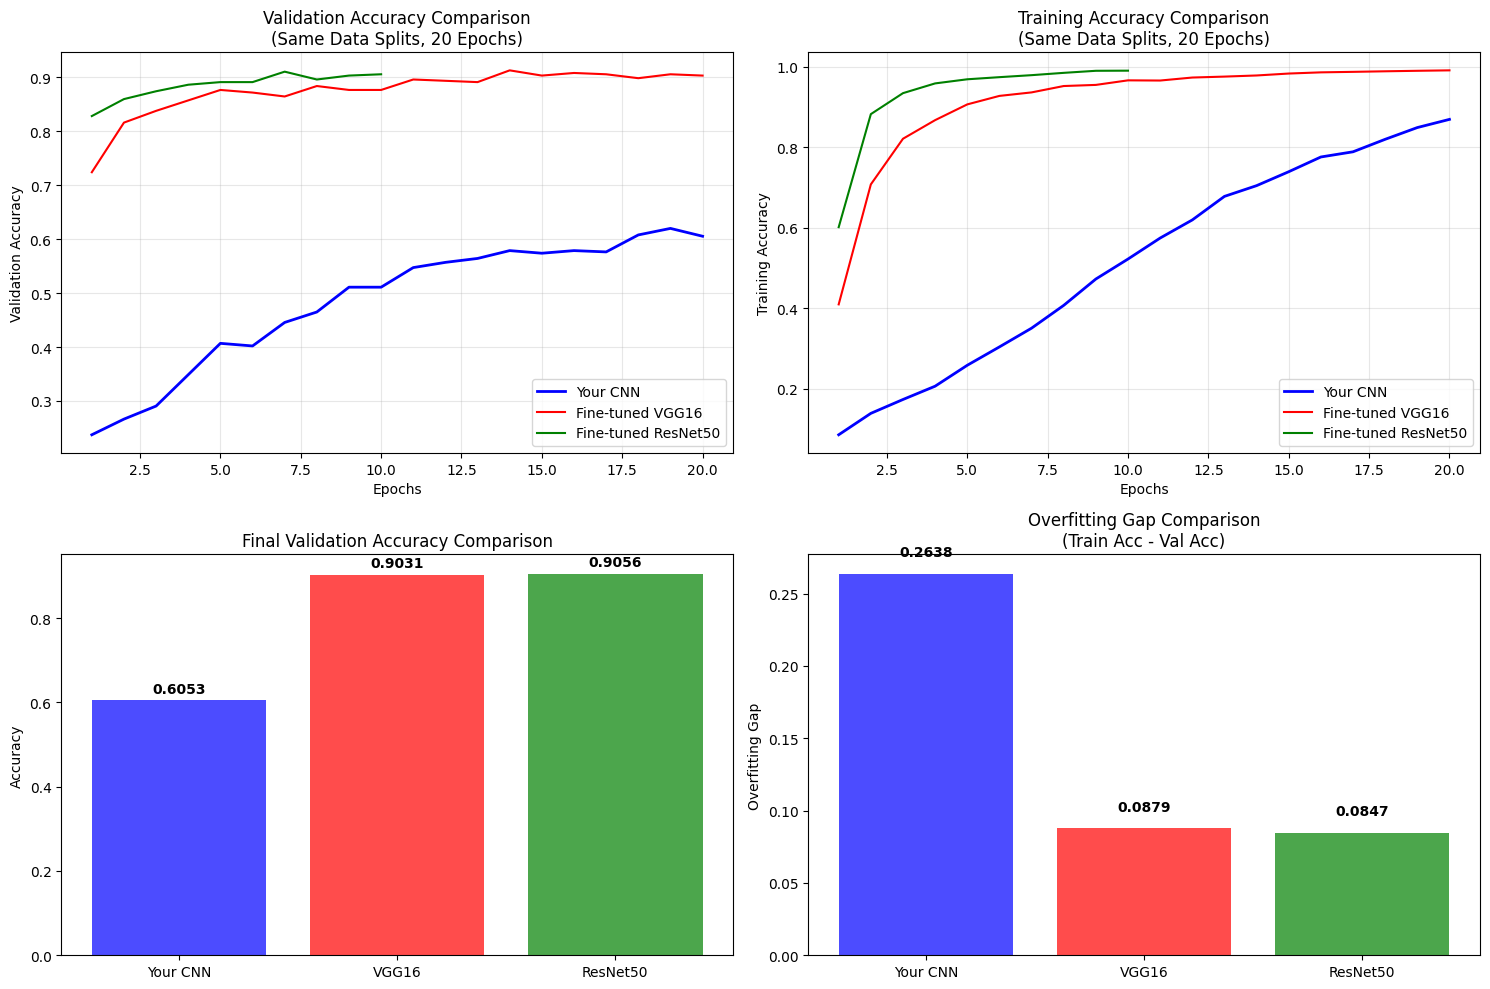

In [ ]:
# STEP 8: VISUAL COMPARISON
print("\n📊 TRAINING PROGRESS COMPARISON")
print("=" * 60)

def plot_comparison(custom_results, pretrained_results):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Colors
    colors = {'Your Custom CNN': 'blue', 'Fine-tuned VGG16': 'red', 'Fine-tuned ResNet50': 'green'}

    # 1. Validation Accuracy Comparison
    epochs = range(1, len(custom_results['history']['val_accuracy']) + 1)
    axes[0, 0].plot(epochs, custom_results['history']['val_accuracy'],
                   label='Your CNN', color=colors['Your Custom CNN'], linewidth=2)

    for model_name, results in pretrained_results.items():
        epochs_pt = range(1, len(results['history']['val_accuracy']) + 1)
        axes[0, 0].plot(epochs_pt, results['history']['val_accuracy'],
                       label=results['name'], color=colors[results['name']])

    axes[0, 0].set_title('Validation Accuracy Comparison\n(Same Data Splits, 20 Epochs)')
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Validation Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Training Accuracy Comparison
    axes[0, 1].plot(epochs, custom_results['history']['accuracy'],
                   label='Your CNN', color=colors['Your Custom CNN'], linewidth=2)

    for model_name, results in pretrained_results.items():
        epochs_pt = range(1, len(results['history']['accuracy']) + 1)
        axes[0, 1].plot(epochs_pt, results['history']['accuracy'],
                       label=results['name'], color=colors[results['name']])

    axes[0, 1].set_title('Training Accuracy Comparison\n(Same Data Splits, 20 Epochs)')
    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Training Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Final Performance Bar Chart
    models = ['Your CNN', 'VGG16', 'ResNet50']
    val_accuracies = [
        custom_results['val_accuracy'],
        pretrained_results['VGG16']['val_accuracy'],
        pretrained_results['ResNet50']['val_accuracy']
    ]

    bars = axes[1, 0].bar(models, val_accuracies,
                         color=['blue', 'red', 'green'], alpha=0.7)
    axes[1, 0].set_title('Final Validation Accuracy Comparison')
    axes[1, 0].set_ylabel('Accuracy')

    for bar, acc in zip(bars, val_accuracies):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

    # 4. Overfitting Comparison
    overfitting_gaps = [
        custom_results['overfitting_gap'],
        pretrained_results['VGG16']['overfitting_gap'],
        pretrained_results['ResNet50']['overfitting_gap']
    ]

    bars = axes[1, 1].bar(models, overfitting_gaps,
                         color=['blue', 'red', 'green'], alpha=0.7)
    axes[1, 1].set_title('Overfitting Gap Comparison\n(Train Acc - Val Acc)')
    axes[1, 1].set_ylabel('Overfitting Gap')

    for bar, gap in zip(bars, overfitting_gaps):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{gap:.4f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.savefig('/content/EN3150_Assignment_03/pretrained_vs_custom_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot the comparison
plot_comparison(custom_cnn_results, pretrained_results)